<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 36px; margin-bottom: 10px;">Movie Industry Exploratory Data Analysis</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">Objective: Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for companies to enter the industry.</p>
</div>

 <p style="font-family: Arial; color: #2F4858; font-size: 24px; line-height: 1.5;">Importing the essential libraries and datasets:</p>
</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
#Setting the default style for plots
plt.style.use('ggplot')

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

In [4]:
# Load each CSV file into a DataFrame using the provided file paths
movie_dates_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/movie_awards.csv', index_col=0)
actors_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/Actors_Table.csv')
directors_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/Directors_Table.csv')
imdb_base_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/IMDb_base.csv')
imdb_budgets_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/IMDb_budgets.csv')
studio_df = pd.read_csv('C:/Users/Manas/Desktop/Movie Industry/studiodf.csv')


In [5]:
#First remove any movies that had a $0 domestic gross.
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

<div style="background-color: #2F4858; font-family: Arial; color: #FFFFFF; font-size: 120%; text-align: left; border-radius: 5px 5px; padding: 10px;">
    Previewing Data
</div>


In [6]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [7]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [8]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [9]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [10]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [11]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [12]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 36px; margin-bottom: 10px;">Question 1: Identifying Most Profitable Movies and Optimal Budget Allocation</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">To determine the most profitable movies, we calculate profit and profit margin for each movie, considering the difference between worldwide gross and production budget. Adjusted budget and adjusted profit columns are created to account for inflation using an average rate of 3.22%.</p>
</div>


In [13]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [14]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34


For this question we are specifically looking at profitable movies.  We'll create a separate dataframe called `profitable_movies_df` where the `Profit` column is greater than 0. We will then sort by `Adjusted_Profit` to rank movies in terms of profitability.

In [15]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True) #Modify the DataFrame in place (do not create a new object).
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34
1,1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
3,3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,28,Jurassic Park,1993,8.10,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.94,117772200.00,1836924085.91


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
<p style="background-color:#2F4858;font-family:Arial;color:#FFFFFF;font-size:120%;text-align:left;border-radius:5px 5px;">Visualizing Profit vs. Budget</p>


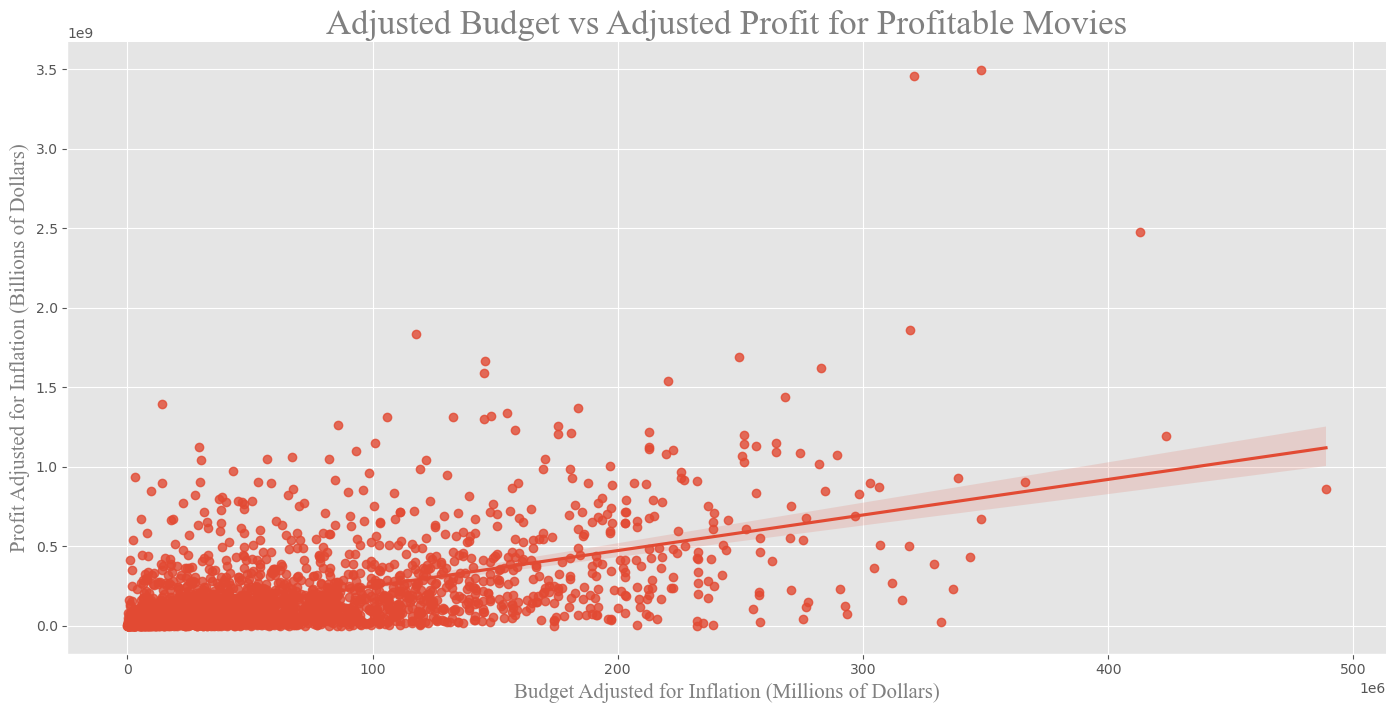

In [100]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('BudgetVProfit', dpi=300)


This scatter plot provides insights into the relationship between budget and profit for profitable movies.

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">Let's examine the budget allocation for the 25 most profitable movies:</p>
</div


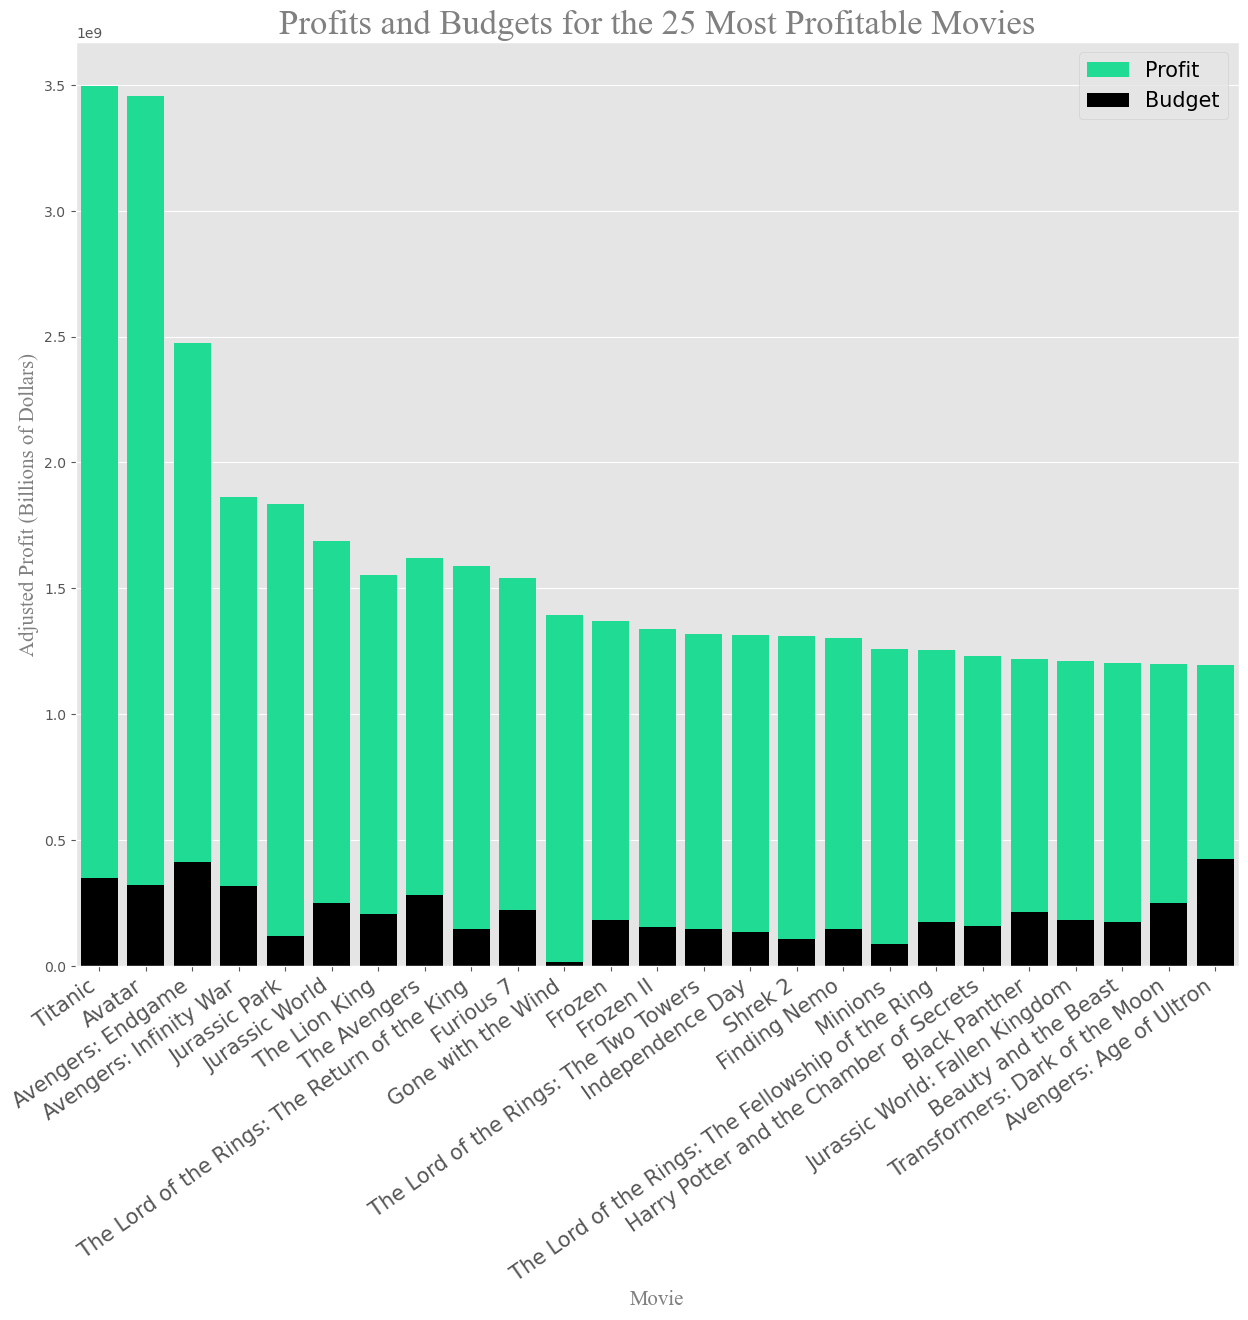

In [105]:
plt.figure(figsize=(15, 12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'], y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], color='mediumspringgreen', label='Profit', errorbar=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'], y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], color='black', label='Budget', errorbar=None)
plt.xlabel('Movie', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.xticks(rotation=35, horizontalalignment='right', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.savefig('ProfitBudgetTop25', dpi=300)


In [102]:
profitable_movies_df['Adjusted_Budget'].describe()

count        2836.00
mean     60689139.20
std      63199464.86
min         10606.40
25%      16608850.00
50%      38684100.00
75%      82247150.00
max     488834200.00
Name: Adjusted_Budget, dtype: float64

In [19]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count          25.00
mean    242777774.40
std      80698866.89
min     106064000.00
25%     180635000.00
50%     225760000.00
75%     282960000.00
max     423765000.00
Name: Adjusted_Budget, dtype: float64

In [20]:
profitable_movies_df['Profit_Margin'].describe()

count   2836.00
mean       0.62
std        0.24
min        0.00
25%        0.47
50%        0.67
75%        0.81
max        1.00
Name: Profit_Margin, dtype: float64

In [21]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count   25.00
mean     0.85
std      0.05
min      0.74
25%      0.81
50%      0.85
75%      0.87
max      0.93
Name: Profit_Margin, dtype: float64

In [22]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

<div style="background-color: #2F4858; color: #FFFFFF; padding: 20px; border-radius: 5px;">
    <p>Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Avengers: Endgame are the most successful movies in terms of sheer profit.</p>
    <p>So how do we know what to spend? We need to think about what sort of profit margin we want to see. 2043 out of 2841 total profitable movies have a profit margin over 50%. That's good news as it indicates that we can be more aggressive in choosing a threshold for the profit margin. The top 25 movies have a median profit margin of 84.9% with a median budget of \$225,760,000. When looking at all of our profitable movies, the profit margin drops significantly to 67.1% and the budget drops significantly to \$38,676,000. We use the median to describe our data here as the mean will be skewed by outlier data.</p>
    <p>Let's filter the data with a profit margin of 75% or greater and a budget greater than \$38,676,000.</p>
</div>


In [108]:

filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

374

After filtering we still have 374 movies left upon which to draw conclusions.

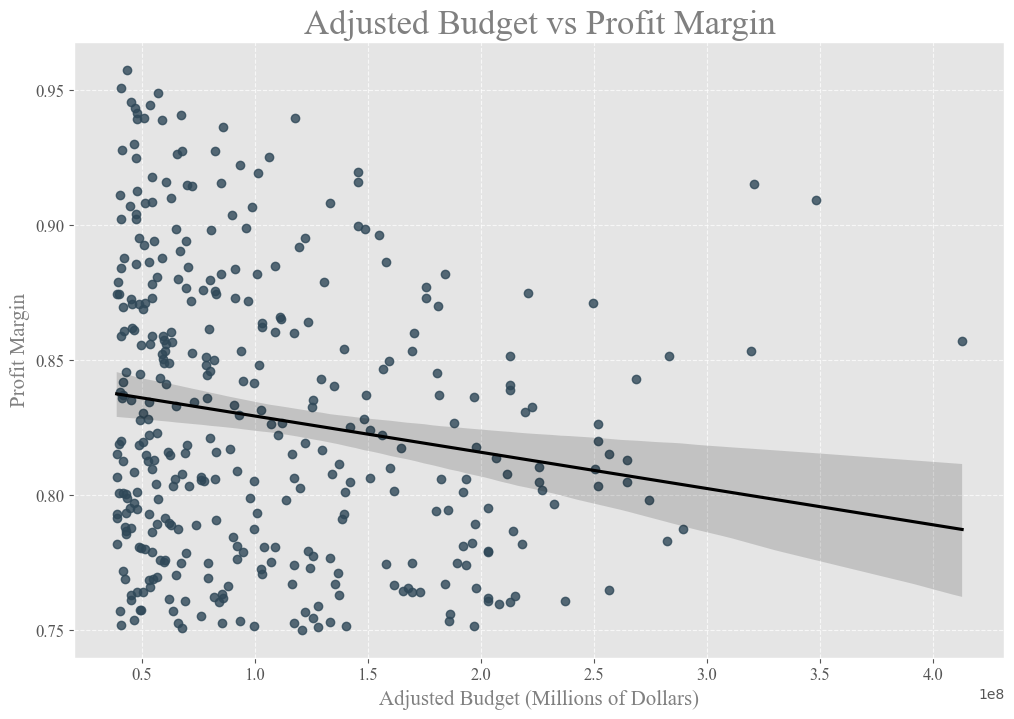

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, scatter_kws={'color': '#2F4858'}, line_kws={'color': 'black'})
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': 15})
plt.ylabel('Profit Margin', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': 15})
plt.title('Adjusted Budget vs Profit Margin', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': 25})
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('BudgetVMargin_Scatter', dpi=300)
plt.show()


In [25]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,391.53,2004.97,7.01,118.60,77814178.13,193378841.67,484994903.63,407180725.50,0.83,105858522.51,562879114.94
std,378.20,10.81,0.90,24.02,57570152.51,127088965.57,377690264.14,329994078.69,0.05,66272237.80,413114307.71
min,0.00,1956.00,3.30,79.00,13500000.00,19019882.00,69995385.00,54995385.00,0.75,38685000.00,123209844.42
25%,111.25,1998.00,6.40,100.00,35000000.00,106948347.75,217288435.75,176354400.25,0.78,53471100.00,274861614.08
50%,279.50,2007.00,7.00,116.00,55000000.00,162801999.50,350937609.00,299062980.00,0.82,82249300.00,449229900.01
75%,550.50,2014.00,7.70,131.75,100000000.00,242081446.50,636084264.50,513979301.75,0.87,139654600.00,719591073.46
max,2424.00,2020.00,9.00,228.00,400000000.00,858373000.00,2797800564.00,2551701337.00,0.96,412880000.00,3495487532.34


<div style="background-color: #2F4858; color: #FFFFFF; padding: 20px; border-radius: 5px;">
    <p>Upon reviewing the scatter plot data, we observe a wider distribution when comparing profit margin to budget. Notably, the trend line indicates a negative correlation, suggesting that excessive spending could potentially compromise our profit margin. In the filtered dataset, we find a median budget of approximately \$82,249,300, coupled with a median profit margin of 81.9%.</p>
    <p><strong>Conclusion for Question 1:</strong> We propose allocating around \$82,250,000 for movie production. This allocation is anticipated to yield a profit margin exceeding 80%.</p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 36px; margin-bottom: 10px;">Question 2: Understanding Movie Genre Trends and Financial Performance</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">In this investigation, we delve into the landscape of movie genres to uncover patterns in production frequency and their impact on financial outcomes. We aim to discern whether the quantity of movies produced within specific genres correlates with higher net profits, shedding light on genre preferences and profitability within the film industry.</p>
</div>


In [26]:
#Create a genre table that separates each value in the genre column in their own rows.
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)

imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index = True, left_index = True)

imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis = 1)

genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()

In [27]:
#Do a count of all movies grouped by genre.
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [28]:
m_by_genre

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


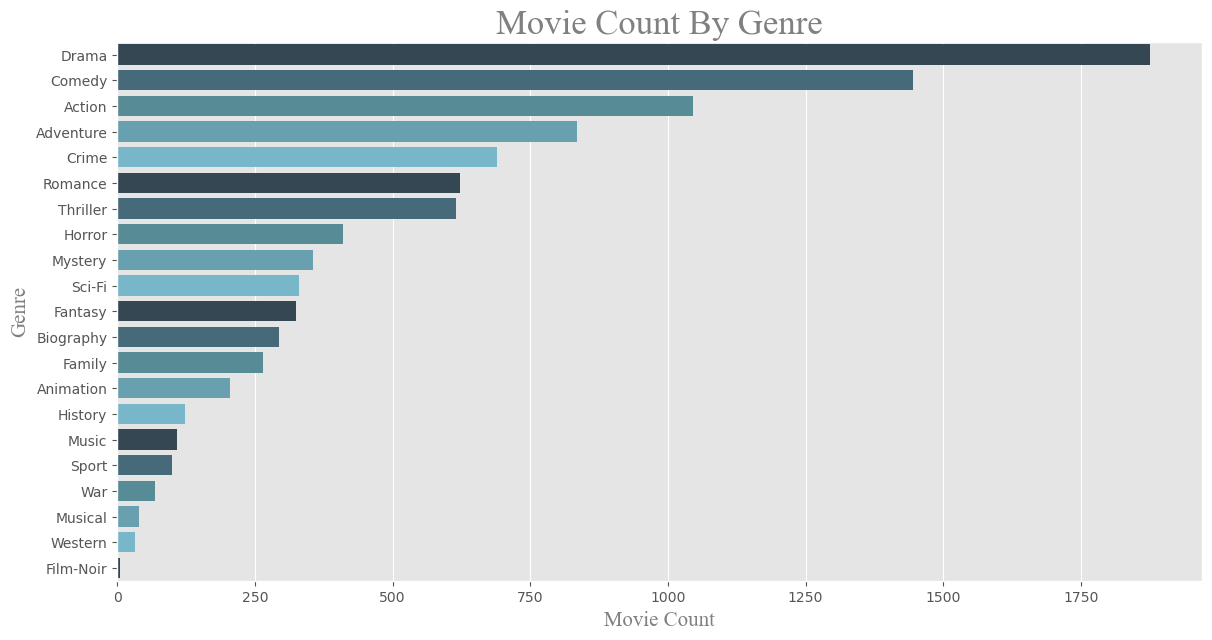

In [113]:
# Define a custom color palette with the provided color code
custom_palette = ['#2F4858', '#3E6D84', '#4D929F', '#5CA7BB', '#6BBDD6']

# Plot the bar chart with the custom color palette
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=m_by_genre['Movie'], y=m_by_genre['Genre'], palette=custom_palette)
plt.xlabel('Movie Count', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Movie Count By Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('CountGenre_CustomColor', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">The genres drama, comedy, and action are most prevalent in terms of quantity, but does this imply they are the most lucrative? To ascertain this, we'll once again categorize each genre, but this time we'll examine the average net profit for each.</p>
</div>


In [30]:
#Once again group the movies by genre, showing the average net profit and profit margin for each.
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)


In [31]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,203606574.36,0.68
1,Adventure,123795016.96,0.61
16,Sci-Fi,76199115.79,0.60
7,Family,74621544.29,0.58
0,Action,64332532.19,0.52
8,Fantasy,54057582.24,0.54
18,Thriller,47338952.53,0.60
13,Musical,46631897.60,0.65
14,Mystery,39634323.82,0.61
11,Horror,38963349.12,0.67


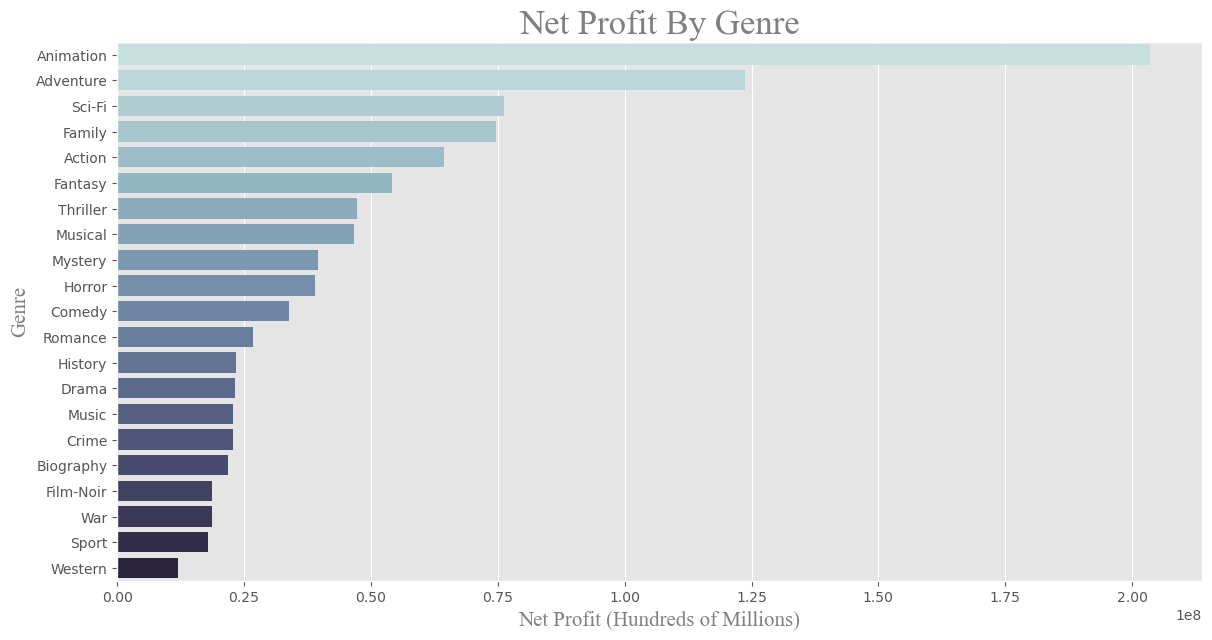

In [130]:
# Define your custom color palette
custom_palette = ['#F9F871', '#9BDE7E', '#4BBC8E', '#039590', '#1C6E7D']

# Plot the findings with the custom color palette
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=p_by_genre['Adjusted_Profit'], y=p_by_genre['Genre'], palette="ch:start=.2,rot=-.3")
plt.xlabel('Net Profit (Hundreds of Millions)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Net Profit By Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('NetProfitGenre', dpi=300)


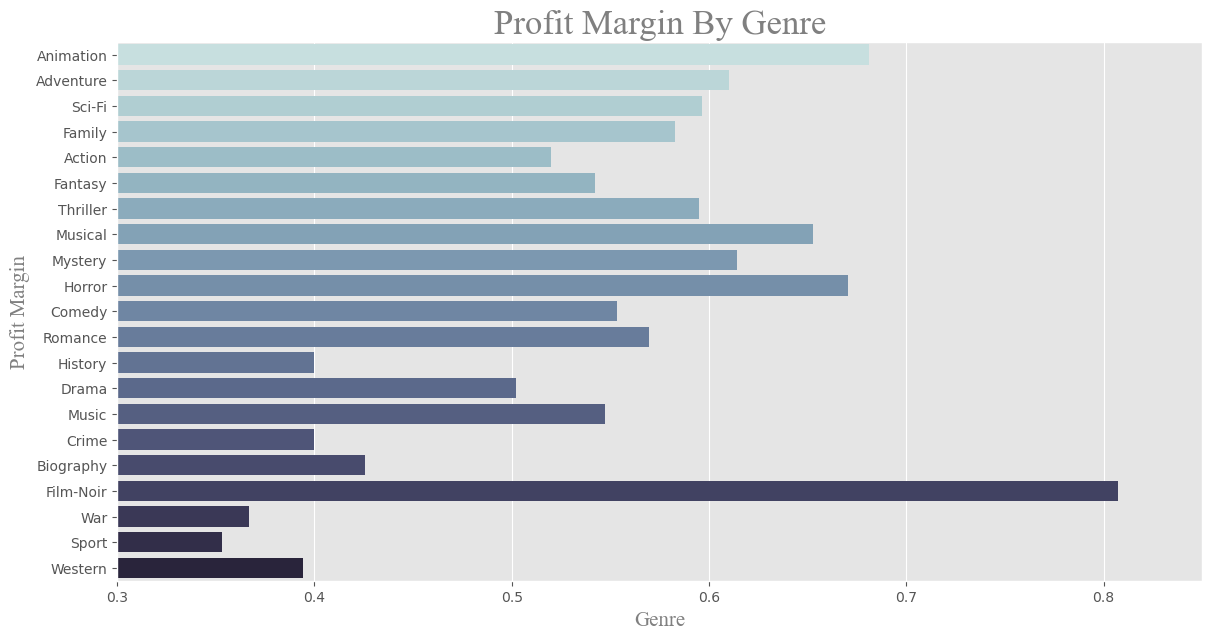

In [134]:
# Plot the findings with the custom color palette
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=p_by_genre['Profit_Margin'], y=p_by_genre['Genre'], palette="ch:start=.2,rot=-.3")
plt.xlabel('Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Profit Margin', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Profit Margin By Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 20px; line-height: 1.5;">Fascinating insights emerge from exploring genre profitability. While animation, adventure, and sci-fi genres aren't the most prevalent in terms of releases, they often yield the highest median net profits. Notably, animation, horror, and musicals stand out for their favorable profit margins. However, it's important to exercise caution when interpreting the seemingly high profit margin (0.8) of Film Noir, given its small sample size.</p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 20px; line-height: 1.5;">Moreover, it's crucial to assess each genre's contribution to the overall net profit. This analysis provides valuable insights into how profits are distributed across different genres.</p>
</div>


In [34]:
#Grouped by genre, find the percent total of the net profit for each.
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,217335741708.40,18.07
0,Action,178930045524.32,14.88
4,Comedy,151922895671.69,12.63
6,Drama,144990041873.71,12.05
16,Sci-Fi,70465612908.78,5.86
2,Animation,68720987812.40,5.71
18,Thriller,65442236225.98,5.44
8,Fantasy,54797139085.80,4.56
15,Romance,50510744180.92,4.20
7,Family,46040638020.14,3.83


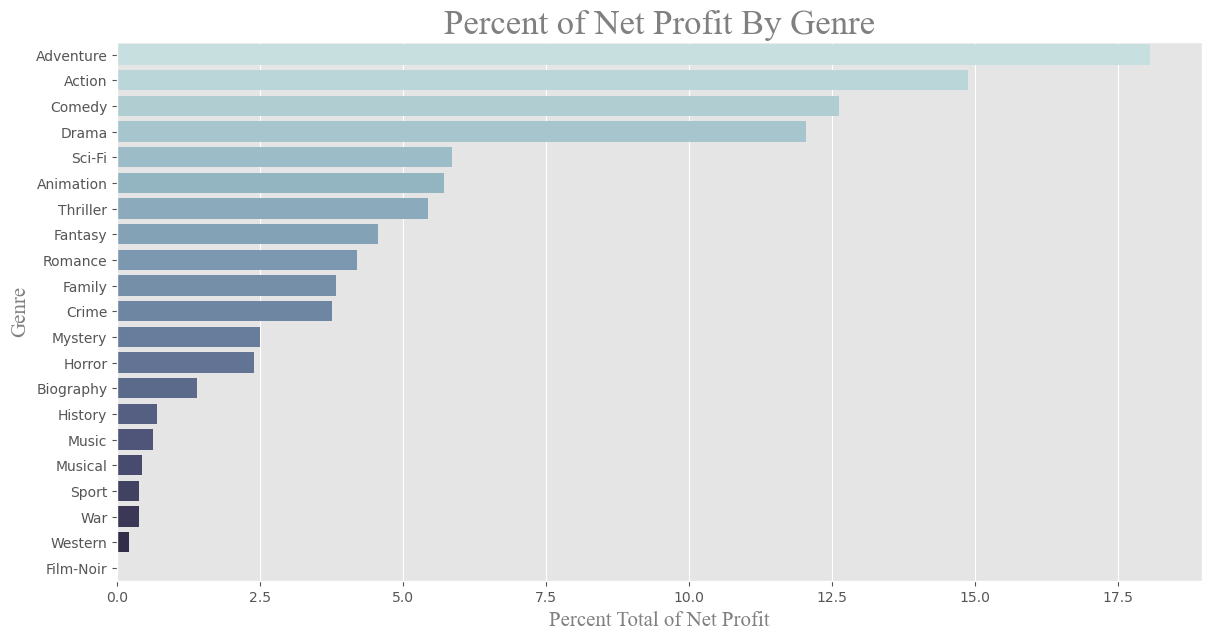

In [135]:
# Plot the findings with the specified color palette
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette="ch:start=.2,rot=-.3")
plt.xlabel('Percent Total of Net Profit', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Percent of Net Profit By Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('PercentProfitGenre')


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Now, it's evident that adventure, action, comedy, and drama constitute the majority of overall net profits from all movies. However, based on our recent observations, we've identified significant opportunities in the animation and sci-fi markets due to lower saturation but higher average net profits. Next, we'll investigate which genres are most successful during different months.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <strong>Conclusion for Question 2:</strong> We recommend that our company focuses its efforts on the top six most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi, and Animation. Furthermore, we suggest prioritizing Sci-Fi and Animation genres due to less competition and a higher potential for profit.
    </p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 36px; margin-bottom: 10px;">Question 3: What is the best time of the year to release a movie?</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">In this investigation, we aim to determine the optimal timing for releasing a movie by analyzing the seasonal patterns of movie releases and their corresponding financial performance. By examining the data, we seek to identify trends and insights that can inform strategic decisions regarding the timing of movie releases to maximize profitability.</p>
</div>


In [36]:
#Convert the Release Date field to type datetime.
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'])

In [37]:
#Add a new column called month, displaying only the month from the release date.
dateData =  [x.strftime('%B') for x in imdb_budgets_df['Release Date']]
imdb_budgets_df['Month'] = dateData

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Let's start by identifying the months with the highest number of movie releases.
    </p>
</div>


In [38]:
#Count the total number of movies and group by month.
m_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
m_by_month

,Month,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


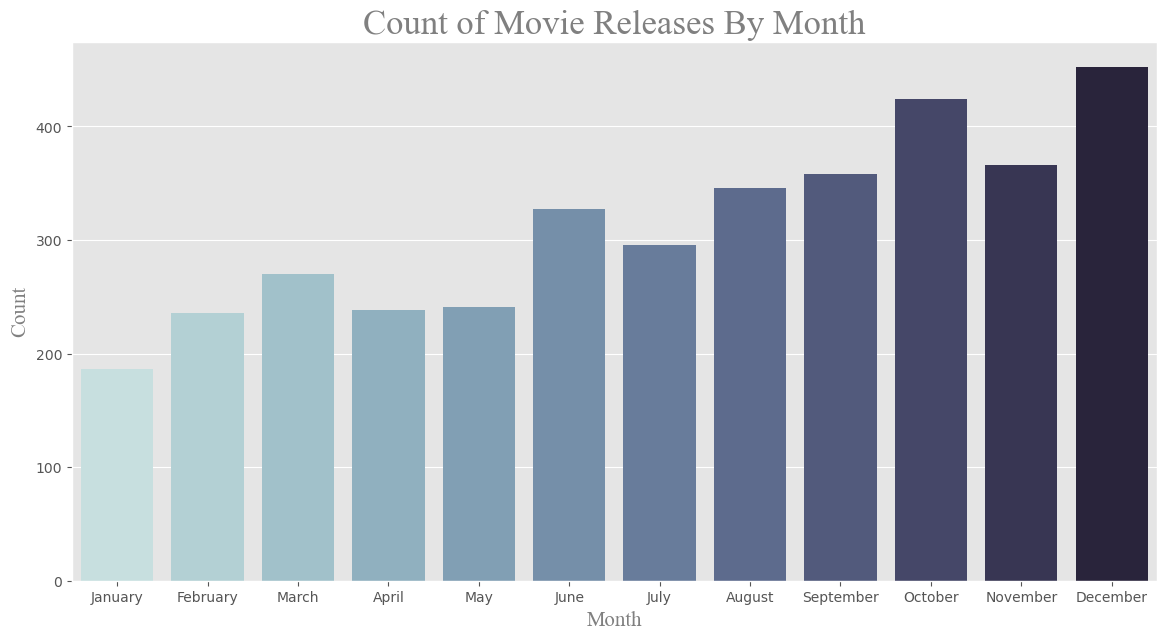

In [137]:
# Plot the findings with the specified color palette
plt.figure(figsize=(14,7))
ax7 = sns.countplot(x=imdb_budgets_df['Month'], palette='ch:start=.2,rot=-.3',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Count', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Count of Movie Releases By Month', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('CountbyMonth', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        It's apparent that December and October have the highest number of movie releases, but does this trend indicate higher profitability? Next, we'll explore the average net income per movie for each month.
    </p>
</div>


In [40]:
#Once again group the movies by month, showing the average net profit for each.
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)
p_by_month

,Month,Adjusted_Profit,Profit_Margin
6,June,80327640.00,0.64
8,May,79372161.65,0.64
5,July,74716618.14,0.64
2,December,56823086.46,0.59
9,November,47476647.51,0.57
3,February,41089454.38,0.56
7,March,33645813.78,0.51
0,April,31435638.57,0.54
4,January,31132342.98,0.56
1,August,25383311.33,0.52


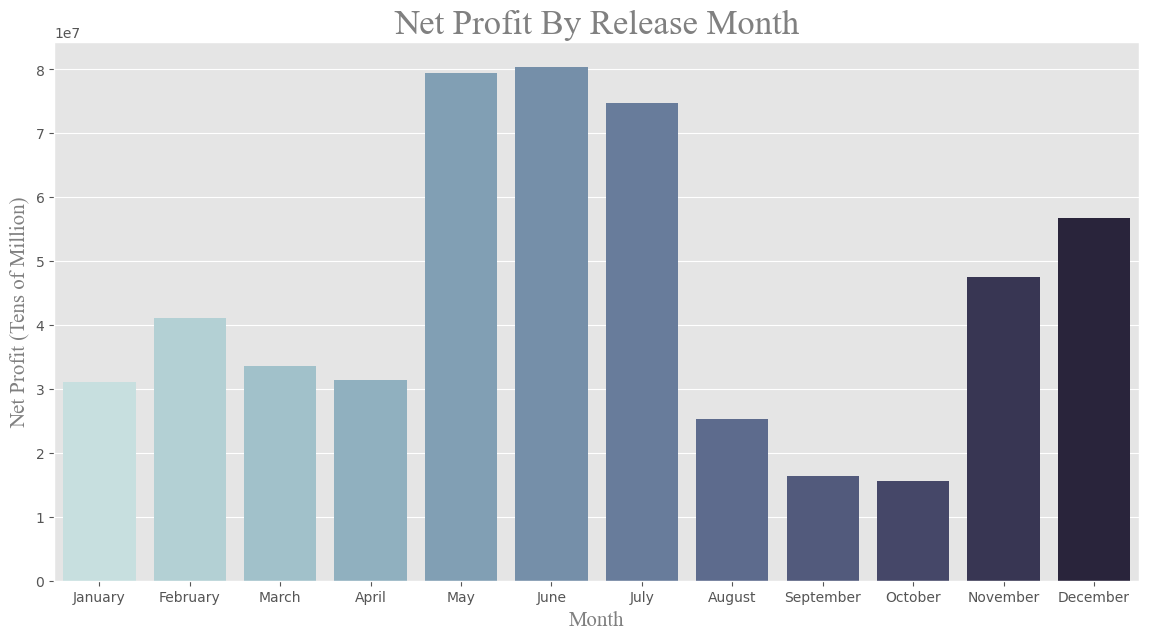

In [140]:
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='ch:start=.2,rot=-.3', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Net Profit (Tens of Million)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Net Profit By Release Month', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('ProfitbyMonth', dpi=300)


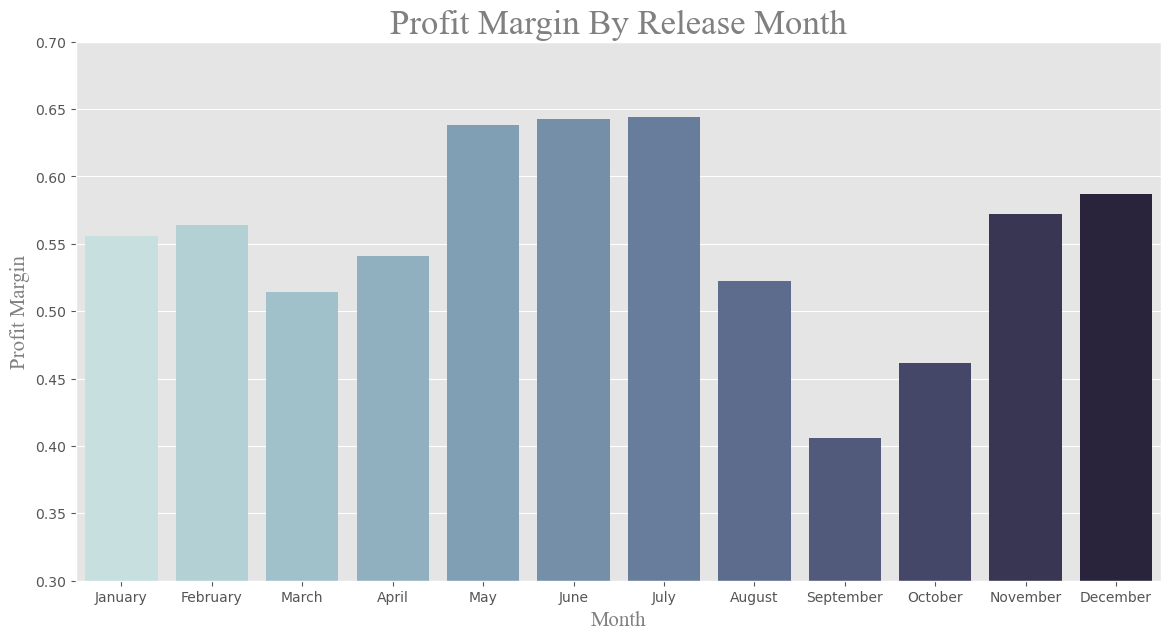

In [141]:
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

plt.figure(figsize=(14,7))
ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='ch:start=.2,rot=-.3', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Profit Margin', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Profit Margin By Release Month', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.ylim(0.3, 0.7)
plt.savefig('MarginByMonth', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Surprisingly, May, June, and July emerge as the frontrunners in both median net profit and profit margin. It seems that the summer months often lead to greater success, possibly due to increased attendance from children and their families during summer vacation.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        As mentioned earlier, let's delve deeper and explore which genres tend to perform best in each month.
    </p>
</div>


In [43]:
#Convert the Release Date field to type datetime
#Add a new column called month, displaying only the month from the release date.
genre_budgets_df['Release Date'] = pd.to_datetime(genre_budgets_df['Release Date'])
genreDate =  [x.strftime('%B') for x in genre_budgets_df['Release Date']]
genre_budgets_df['Month'] = genreDate

In [44]:
#Create a new table called month_genre consisting of Genre, Month, Net Profit, and Release Date
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
#Group by Genre and Month, displaying the average Net Profit for each combination.
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [45]:
#Slice the top six most profitable genres from above.
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [46]:
#Concatenate the six new tables into one new table.
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [47]:
#Create a table of the months in order.
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Create a pivot table of month_genre_df, use the month_in_order table to reindex the pivot table.
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [48]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,67911226.86,101480251.68,254304586.21,70321717.64,43539017.01,86131136.28
February,107741220.58,149172991.22,273699863.40,78129901.96,63807537.49,123463145.04
March,127548996.11,200474749.59,240295152.35,81411129.63,52348133.09,171335731.24
April,259392394.58,371426341.09,135514583.52,50050513.61,77199294.63,400992743.36
May,300431780.23,376946029.72,587476204.76,187839907.64,96590740.22,381838680.03
June,265101499.32,392963586.66,587763663.68,175416615.42,112382070.55,366873462.47
July,257293527.76,280812330.30,325184250.83,140927144.14,119198995.62,262513716.23
August,78993517.46,81128041.19,108115881.94,52702618.10,65637106.34,80812011.13
September,52980175.19,93388465.69,153847514.52,53288686.20,40194497.00,110804792.63


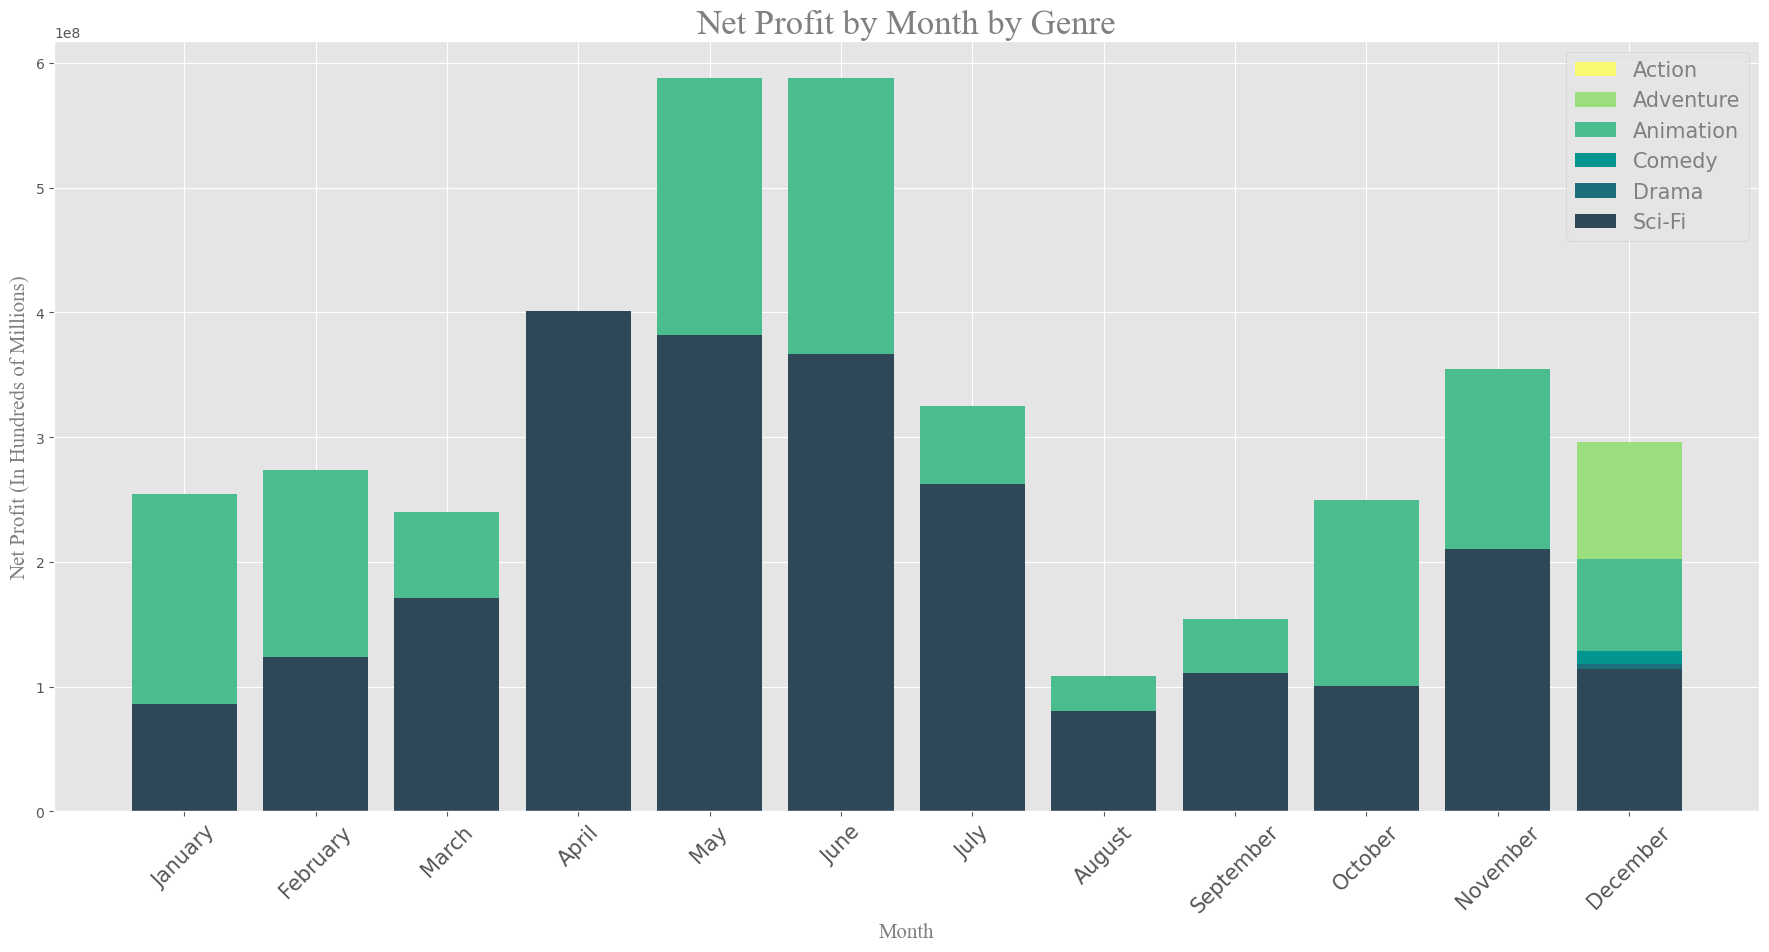

In [145]:
# Define custom color palette
custom_palette = ['#F9F871', '#9BDE7E', '#4BBC8E', '#039590', '#1C6E7D', '#2F4858']

# Plot the grouped bar chart for net profit by month by genre with the custom color palette
plt.figure(figsize=(22, 10))

# Iterate over each genre to plot the bars
for i, genre in enumerate(month_genre_pivoted.columns[:6]):
    plt.bar(month_genre_pivoted.index, month_genre_pivoted[genre], label=genre, color=custom_palette[i])

# Other plot configurations
plt.legend(labelcolor='grey', loc='best', prop={'size': 15})
plt.xlabel('Month', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Net Profit (In Hundreds of Millions)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Net Profit by Month by Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Upon closer examination, it becomes evident that each genre follows a similar trend, with the summer months emerging as the most profitable period for movie releases. Further analysis reveals that releasing an animation film, in particular, during the summer months holds the greatest potential for generating high net profits. Conversely, the release date appears to have minimal impact on the performance of drama films, despite slight fluctuations across different months. When contemplating the factors contributing to a successful movie, it becomes apparent that timing plays a crucial role.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <strong>Conclusion for Question 3:</strong> We recommend that our company focus on releasing the majority of its movies, especially those in the animation genre, during the summer months. While adventure, drama, and comedy films may also experience success if released in November, our primary recommendation remains to prioritize summer releases.
    </p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 36px; margin-bottom: 10px;">Question 4: Determining the Impact of Actors and Directors on Movie Success</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">
        Now that we've gained deeper insights into the factors contributing to a successful movie, let's explore the roles of actors and directors in driving value. By analyzing their impact on movie success, we aim to identify the individuals who consistently deliver high-value performances and contributions.
    </p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 16px; line-height: 1.5;">
        In this section, we are going to take a look at the average net profit across all movies. From there, we want to determine which actors and directors consistently appear in movies where the net profit substantially exceeds the average. We will represent this in a field called Value Above Replacement (VAR). To further simplify this concept; if across all movies the average net profit is one hundred dollars and the average net profit of movies from Actor X is two hundred dollars, he/she would have a VAR of 2. This number represents X times over the average. To eliminate outliers, we will look at actors who appear in ten or more movies and directors who work in five or more.
    </p>
</div>


In [50]:
#Similar to the imdb_budget_df table let's start by adjusting for inflation.
actors_df['Production Budget'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Production Budget']
actors_df['Worldwide Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Worldwide Gross']
actors_df['Domestic Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Domestic Gross']

In [51]:
#Calculate Net Profit and Profit Margin
actors_df['Net Profit'] = actors_df['Worldwide Gross'] - actors_df['Production Budget']
actors_df['Profit Margin'] = actors_df['Net Profit'] / actors_df['Worldwide Gross']

In [52]:
#Let's filter the actors_df table to only include actors that appeared in 10 or more movies
actor_counts = actors_df['value'].value_counts()
actor_list = actor_counts[actor_counts >= 10].index.tolist()
actors_df = actors_df[actors_df['value'].isin(actor_list)]

In [53]:
#Calculate VAR, which is the average Net Profit by actor divided by average Net Profit for all movies.
actor_total = actors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
actor_total['VAR'] = (actor_total['Net Profit']/actor_total['Net Profit'].mean())

In [54]:
#Create new table consisting of top 25 actors by VAR.
top_actors = actor_total.head(25)
top_actors

,value,Net Profit,VAR
113,Ian McKellen,642641141.05,4.56
88,Emma Watson,594070330.59,4.22
48,Chris Hemsworth,550993070.74,3.91
47,Chris Evans,518397913.83,3.68
262,Robert Downey Jr.,484884995.15,3.44
82,Elijah Wood,468414890.65,3.33
227,Mike Myers,451615981.41,3.21
324,Zoe Saldana,418413981.69,2.97
205,Mark Ruffalo,418051684.80,2.97
166,Josh Hutcherson,389946768.85,2.77


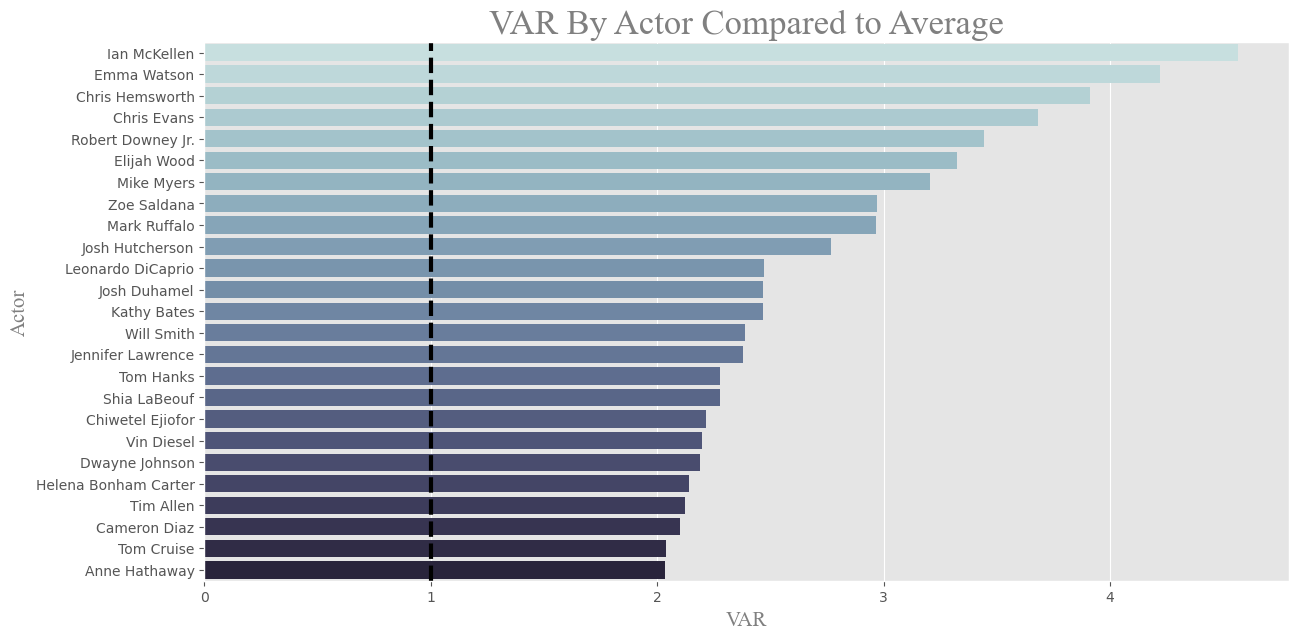

In [146]:
plt.figure(figsize=(14,7))
ax11 = sns.barplot(x=top_actors['VAR'], y=top_actors['value'], palette='ch:start=.2,rot=-.3')
plt.axvline(1, ls='--', color='black', linewidth=3)
plt.xlabel('VAR', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Actor', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('VAR By Actor Compared to Average', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('VARActor', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        This list showcases actors who consistently feature in highly profitable movies, often surpassing the average by two to four and a half times. When it comes to casting a movie, this shortlist provides an excellent starting point for making casting decisions.
    </p>
</div>


In [56]:
#Adjust directors table for inflation.
directors_df['Production Budget'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Production Budget']
directors_df['Worldwide Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Worldwide Gross']
directors_df['Domestic Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Domestic Gross']

In [57]:
#Calucalte Net Profit and Profit Margin.
directors_df['Net Profit'] = directors_df['Worldwide Gross'] - directors_df['Production Budget']
directors_df['Profit Margin'] = directors_df['Net Profit'] / directors_df['Worldwide Gross']

In [58]:
#Let's filter the actors_df table to only include actors that appeared in 5 or more movies.
director_counts = directors_df['value'].value_counts()
director_list = director_counts[director_counts >= 5].index.tolist()
directors_df = directors_df[directors_df['value'].isin(director_list)]

In [59]:
#Calculate VAR, which is the average Net Profit by director divided by average Net Profit for all movies.
director_total = directors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
director_total['VAR'] = (director_total['Net Profit']/actor_total['Net Profit'].mean())

In [60]:
#Create new table consisting of top 25 directors by VAR.
top_directors = director_total.head(25)
top_directors

,value,Net Profit,VAR
78,James Cameron,1244750157.55,8.84
11,Anthony Russo,1017389415.62,7.22
89,Joe Russo,1017389415.62,7.22
115,Lee Unkrich,912067911.25,6.48
148,Peter Jackson,821878024.53,5.84
50,David Yates,688135205.04,4.89
104,Jon Favreau,628704113.52,4.46
129,Michael Bay,588804626.49,4.18
96,John Lasseter,577254528.66,4.10
31,Christopher Nolan,576508914.30,4.09


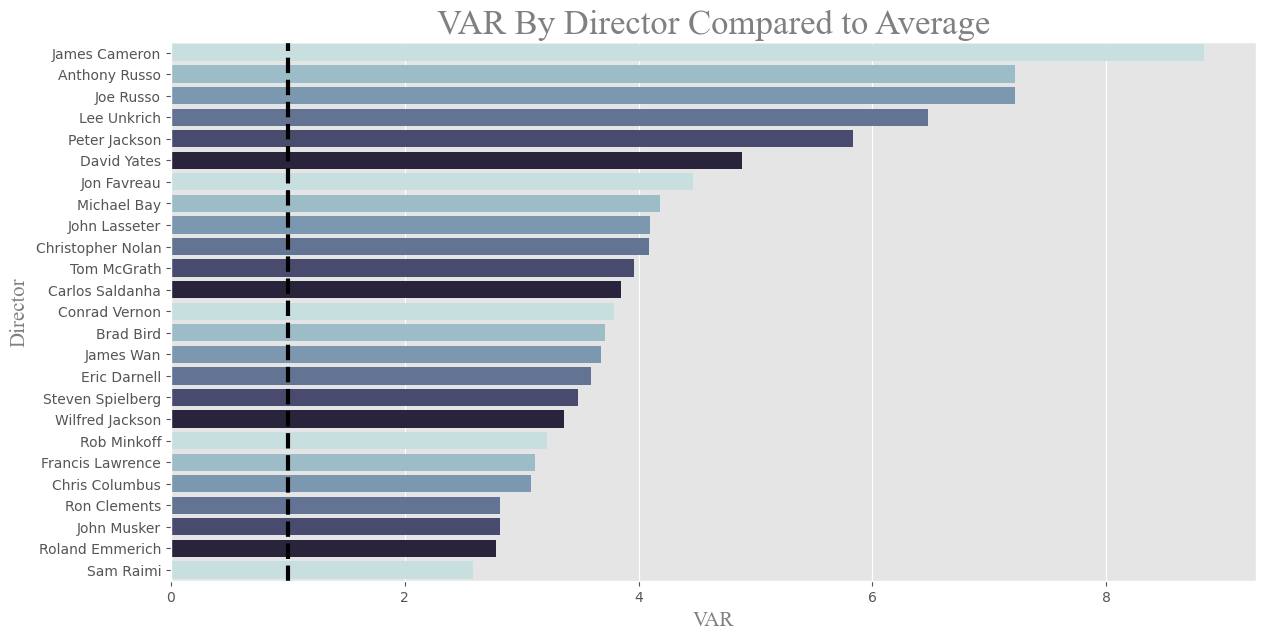

In [150]:
#Plot above finding and label the average of 1 with a black line.

custom_palette = sns.color_palette("ch:start=.2,rot=-.3")

# Plot above finding and label the average of 1 with a black line
plt.figure(figsize=(14,7))
ax12 = sns.barplot(x=top_directors['VAR'], y=top_directors['value'], palette=custom_palette)
plt.axvline(1, ls='--', color='black', linewidth=3)
plt.xlabel('VAR', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Director', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('VAR By Director Compared to Average', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('VARDirector', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        It's evident that the most significant value is added by the director's chair. For instance, James Cameron's movies, on average, generate nearly nine times the revenue of an average movie, underscoring the pivotal role of strong leadership on a film set. Further exploration into the impact of actors and directors would require an examination of the genres they frequently contribute to.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <strong>Conclusion for Question 4:</strong> We recommend that our company focuses its casting and crew selection on individuals consistently scoring at least 1.0 on the VAR scale. Such individuals are likely to significantly enhance the overall production quality.
    </p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 36px; margin-bottom: 10px;">Question 5: Determining the Budget for Winning an Oscar</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 24px; line-height: 1.5;">
        To address this question, we'll begin by merging the `imdb_budgets_df` dataframe with the `awards_df` dataframe. Since there may be movies with duplicate titles, we'll set the indices of both dataframes to the movie name and year to ensure accurate matching of data during the join process.
    </p>
</div>


In [62]:
imdb_budgets_df.set_index(['Movie','Year'], inplace=True)
awards_df.set_index(['film_name', 'film_year'], inplace=True)

In [63]:
budgets_and_awards = imdb_budgets_df.join(awards_df, how='inner', on=['Movie', 'Year'])
budgets_and_awards.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month,awards_won,awards_nominated,win_rate
Movie,Year,,,,,,,,,,,,,,,,
Avatar,2009,7.80,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57,December,3,9,0.33
Black Panther,2018,7.30,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41,February,3,7,0.43
Titanic,1997,7.80,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34,December,11,14,0.79
The Dark Knight,2008,9.00,PG-13,152,"[Action, Crime, Drama]",2008-07-11,185000000,533720947,1000742751,815742751,0.82,256484000.00,1130945749.99,July,2,8,0.25
Toy Story 4,2019,7.80,G,100,"[Animation, Adventure, Comedy]",2019-06-20,200000000,434038008,1073394813,873394813,0.81,206440000.00,901518125.98,June,1,2,0.50


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        We've successfully joined the two dataframes. Let's filter the dataframe to include movies where the profit is greater than 0.
    </p>
</div>


In [64]:
nominated_movies_df = budgets_and_awards.loc[budgets_and_awards['Profit'] > 0]

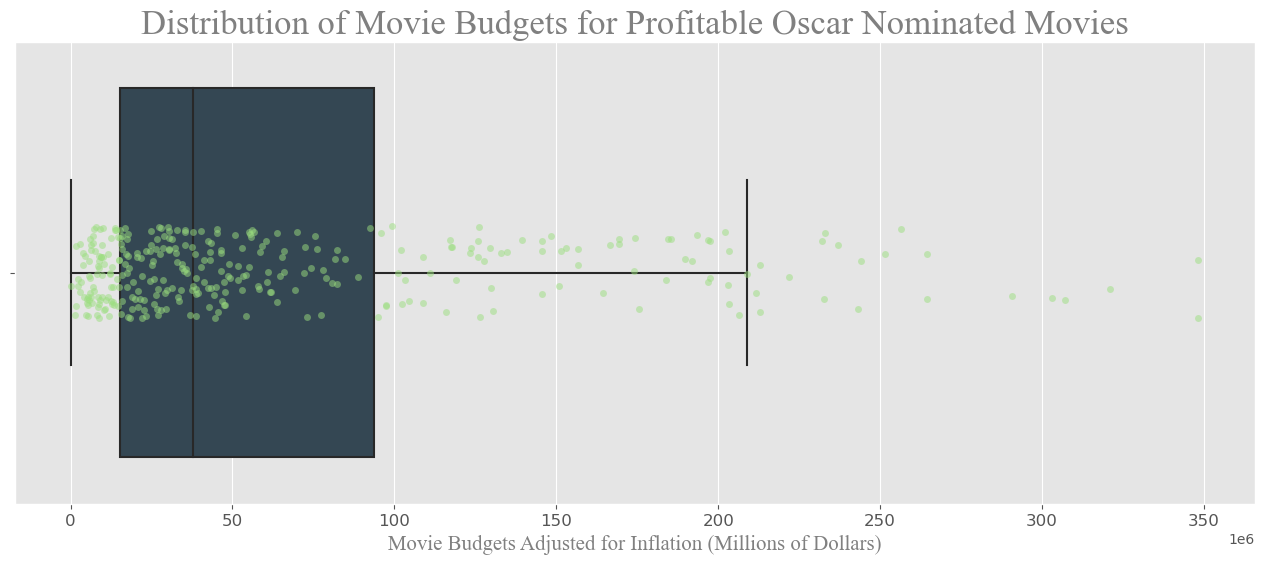

In [157]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Adjusted_Budget', data=nominated_movies_df, showfliers=False, color='#2F4858')
sns.stripplot(x='Adjusted_Budget', data=nominated_movies_df, color='#9BDE7E', alpha=0.5)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Distribution of Movie Budgets for Profitable Oscar Nominated Movies', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('Oscar_Nominated', dpi=300)


In [66]:
nominated_movies_df['Adjusted_Budget'].describe()

count         331.00
mean     66479336.13
std      72497186.73
min        212790.00
25%      15425660.00
50%      37816500.00
75%      93598000.00
max     348300000.00
Name: Adjusted_Budget, dtype: float64

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Upon analyzing the distribution of movie budgets, it becomes apparent that the majority of data falls below the $100 million mark.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        To ensure the accuracy of our analysis and address our core inquiry, we must narrow our focus to movies that have garnered an Oscar. Merely filtering by win rate might not suffice, as it could encompass movies nominated in a single category and won, thereby potentially distorting the win rate. Let's delve into the mean and median win rates to establish a definitive threshold for award nominations.
    </p>
</div>


In [67]:
nominated_movies_df['win_rate'].describe()
#Let's be conservative for win rate and use the median win rate
#That means we would need to be nominated for at least 3 awards in order to win 1 award.

count   330.00
mean      0.45
std       0.28
min       0.00
25%       0.25
50%       0.39
75%       0.60
max       1.00
Name: win_rate, dtype: float64

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        The mean win rate stands at 44.8%, albeit skewed by movies with only 1 nomination. In contrast, the median win rate, at 39.2%, provides a more conservative estimate less influenced by outliers. Based on the median win rate, our movie would need to secure at least 3 nominations to clinch a win. Hence, 3 nominations would serve as the threshold.
    </p>
</div>


263


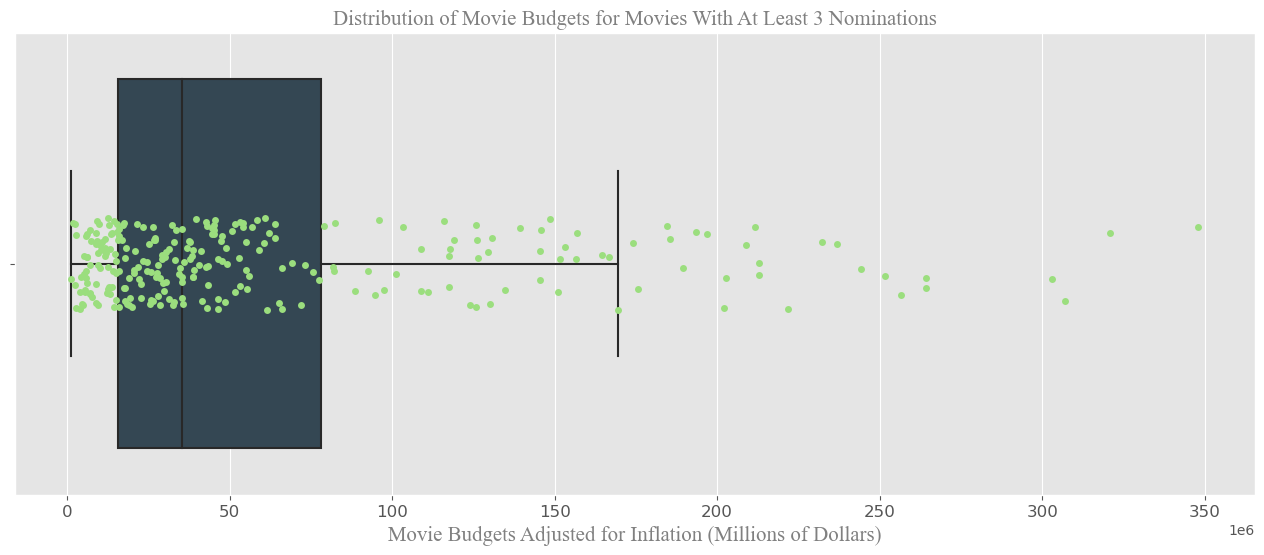

In [160]:
nominated_over_three = nominated_movies_df.loc[nominated_movies_df['awards_nominated'] >= 3]
print(len(nominated_over_three))
plt.figure(figsize=(16,6))
sns.boxplot(x=nominated_over_three['Adjusted_Budget'], showfliers=False, color='#2F4858')
sns.stripplot(x='Adjusted_Budget', data=nominated_over_three, color='#9BDE7E')
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Distribution of Movie Budgets for Movies With At Least 3 Nominations', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.savefig('3_Nominations', dpi=300)


In [69]:
nominated_over_three['Adjusted_Budget'].describe()

count         263.00
mean     62404651.14
std      69126844.12
min       1224990.00
25%      15482900.00
50%      35465000.00
75%      78132000.00
max     348120000.00
Name: Adjusted_Budget, dtype: float64

It's important to note that the box plot of the `nominated_over_three` dataframe has shrunk! This means that our filter has decreased our interquartile range for the movie budget.  Since this range is smaller there should be less variability in the middle of the data set. Since we have adjusted budgets that are extreme outliers, it is best to use the median as the primary measure of central tendency. The median adjusted budget for this data is 35,465,000 Dollars. 
 
**Question 5 Conclusion**: Our Company should spend at least 35,465,000 Dollars in order to make an Oscar-winning movie.

*It is also worth noting that the 75th percentile of the adjusted budget for movies with at least three nominations is 78,132,000 Dollars. This is close to our recommendation of a 82 million budget for a profitable movie with a profit margin of approximately 80%.*

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 24px; margin-bottom: 10px;">Question 6: Impact of Runtime and Movie Rating on Financial Performance and IMDb Rating</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        In this investigation, we aim to analyze the influence of runtime and movie ratings on both financial performance metrics, such as net profit and profit margin, and IMDb ratings. We'll explore whether longer or shorter runtimes correlate with higher net profits and profit margins, and if higher movie ratings result in increased financial success. This analysis will provide insights into the relationship between runtime, movie ratings, and various performance indicators in the film industry.
    </p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Let's first start by analyzing the ratings. We want to include only movies rated G, PG, PG-13, or R.
    </p>
</div>

In [70]:
rating_counts = imdb_budgets_df['Rating'].value_counts()
rating_list = rating_counts[rating_counts >= 50].index.tolist()
rating_df = imdb_budgets_df[imdb_budgets_df['Rating'].isin(rating_list)]

In [71]:
rating_df = rating_df.reset_index()
rating_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Avengers: Endgame,2019,8.40,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16,April
1,Avatar,2009,7.80,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57,December
2,Black Panther,2018,7.30,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41,February
3,Avengers: Infinity War,2018,8.40,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16,April
4,Titanic,1997,7.80,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34,December


In [72]:
#Count the total number of movies and group by month.
rating_count = rating_df.groupby(['Rating'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
rating_count

,Rating,Movie
3,R,1631
2,PG-13,1339
1,PG,590
0,G,93


In [73]:
#Group by Rating let's determine which has the highest median net profit and profit margin.
rating_df2 = rating_df.groupby(['Rating'], as_index=False)[['Adjusted_Profit', 'Profit_Margin', 'IMDb']].median().sort_values(by='Adjusted_Profit', ascending=False)
rating_df2

,Rating,Adjusted_Profit,Profit_Margin,IMDb
0,G,154376810.04,0.76,7.10
1,PG,75404192.25,0.62,6.50
2,PG-13,49565772.61,0.55,6.30
3,R,20402474.98,0.51,6.60


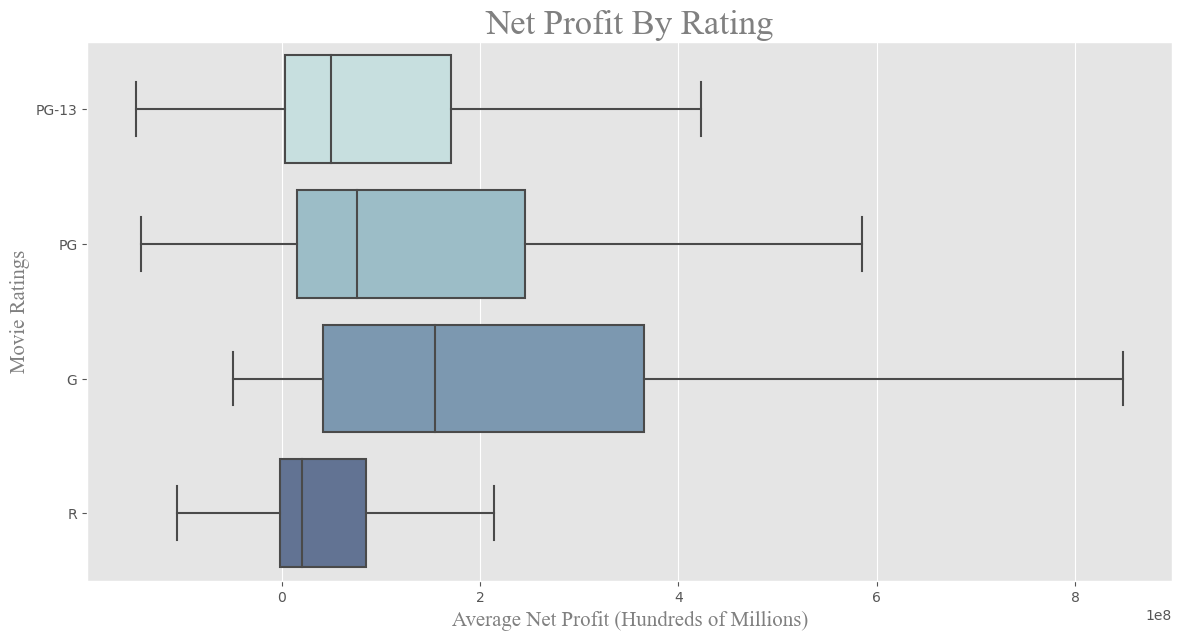

In [162]:
# Plot your above findings
plt.figure(figsize=(14,7))
ax13 = sns.boxplot(y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.xlabel('Average Net Profit (Hundreds of Millions)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Movie Ratings', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Net Profit By Rating', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('ProfitbyRating', dpi=300)


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        As you can observe, G and PG rated movies tend to perform exceptionally well and represent a smaller market share. This presents another lucrative opportunity akin to the animation genre, where competition is lower. Exploring the total net profit breakdown by genre and rating could provide valuable insights into the ideal combinations for optimal performance.
    </p>
</div>


In [75]:
# First drop the rating column from genre_budgets_df and genre from rating_df
genre_rating_df = genre_budgets_df.drop(['Rating'], axis=1)
rating_df = rating_df.drop(['Genre'], axis=1)

In [76]:
# Merge the genre_rating_df table and rating_df table
genre_rating_df = pd.merge(genre_rating_df, rating_df)

In [77]:
#Slice the top six most profitable genres.
Adv_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Adventure')]
Act_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Action')]
Com_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Comedy')]
Dra_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Drama')]
Sci_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Sci-Fi')]
Ani_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Animation')]

genre_concat = [Adv_df, Act_df, Com_df, Dra_df, Sci_df, Ani_df]
genre_rating = pd.concat(genre_concat)

In [78]:
# Create a pivot table from genre_rating
gr_df = genre_rating.groupby(['Genre', 'Rating'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
gr_pivoted = gr_df.pivot(index='Genre', columns='Rating', values='Adjusted_Profit')

In [79]:
# Preview the table.
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,476713962.52,24806502581.61,118476527154.35,34527820240.94
Adventure,17497561206.41,74656830471.14,114180501731.83,10663312187.82
Animation,20451774875.23,46792514260.78,682637577.33,120368587.97
Comedy,14989898831.46,61733858474.80,44722618139.99,30095649966.62
Drama,6452247472.37,19785801203.02,64695667306.22,50557666303.54
Sci-Fi,575199818.94,4693467863.02,54045363674.82,11072810424.26


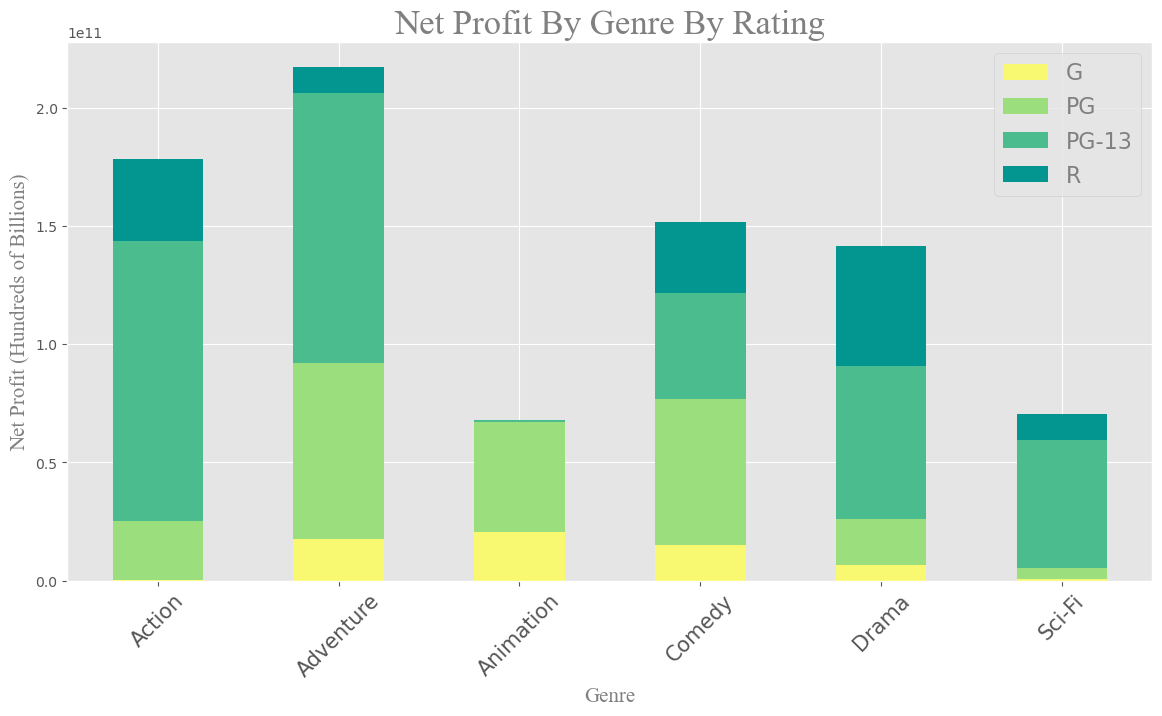

In [163]:
# Plot the above findings.
# Define the color palette using the provided color codes
colors = ['#F9F871', '#9BDE7E', '#4BBC8E', '#039590', '#1C6E7D', '#2F4858']

# Plot the above findings with the custom color palette
ax14 = gr_pivoted.plot(kind='bar', stacked=True, figsize=(14,7), color=colors)
plt.legend(labelcolor='grey', prop={'size': 16})
plt.xlabel('Genre', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Net Profit (Hundreds of Billions)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Net Profit By Genre By Rating', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyGenrebyRating')


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        As expected, animation movies are predominantly rated G and PG. However, for most other genres, PG-13 rated movies contribute significantly to their total net profits. This suggests that targeting specific ratings within each genre could maximize success.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Now let's explore the impact of movie length. Does runtime influence a movie's success?
    </p>
</div>

In [81]:
# Create a new table with runtime, net profit and profit margin.
runtime_df = imdb_budgets_df[['Runtime', 'Adjusted_Profit', 'Profit_Margin']]
runtime_df

,,Runtime,Adjusted_Profit,Profit_Margin
Movie,Year,,,
Avengers: Endgame,2019,181,2475009742.16,0.86
Avatar,2009,162,3455513950.57,0.92
Black Panther,2018,134,1219912433.41,0.85
Avengers: Infinity War,2018,149,1860954122.16,0.85
Titanic,1997,194,3495487532.34,0.91
...,...,...,...,...
The Misfits,1961,125,12179160.00,0.51
Judgment at Nuremberg,1961,179,20298600.00,0.70
The Wrong Man,1956,105,2448640.00,0.40


In [82]:
# Let's start by taking a look at the correlation between runtime and net profit/profit margin.
pearsoncorr = runtime_df.corr(method='pearson')
pearsoncorr

,Runtime,Adjusted_Profit,Profit_Margin
Runtime,1.00,0.22,0.05
Adjusted_Profit,0.22,1.00,0.05
Profit_Margin,0.05,0.05,1.00


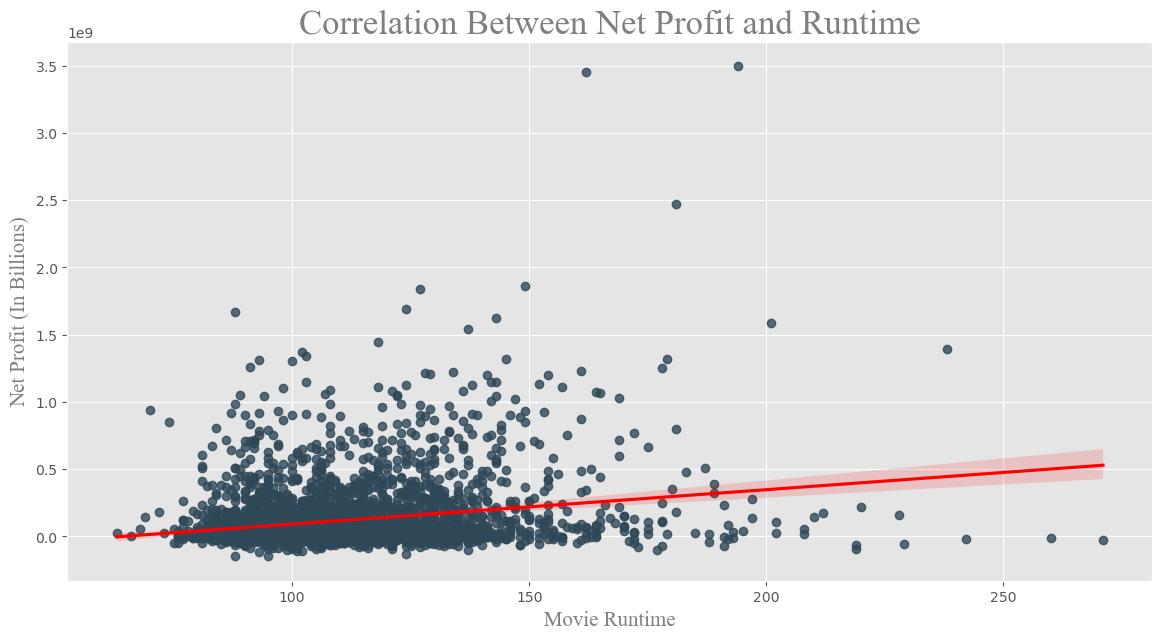

In [175]:
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='Runtime', y='Adjusted_Profit', data=imdb_budgets_df, scatter_kws={'color': '#2F4858'}, line_kws={'color': 'red'})
plt.xlabel('Movie Runtime', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Net Profit (In Billions)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Correlation Between Net Profit and Runtime', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('CorrProfitRuntime', dpi=300)



<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Although there is a small positive correlation of 0.223, indicating that longer runtimes tend to yield slightly higher net profits, this relationship is very weak. Consequently, there is no significant impact of movie runtime on overall profitability. It is not crucial to keep a movie above or below a certain time threshold.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <strong>Question 6 Conclusion:</strong> Our recommendation is for our Company to consider the movie rating based on the genre and target audience. For animation movies, sticking to a G or PG rating is advisable, while PG-13 is optimal for other genres. As for runtime, there is little correlation with overall profitability.
    </p>
</div>


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 24px; margin-bottom: 10px;">Question 7: Establishing the Baseline for Sustainable Success</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Building upon our analysis of Net Profit and Profit Margin, we aim to determine the baseline for sustainable success for our Company.
    </p>
</div>

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Now, let's delve into what our Company should anticipate in terms of profitability to remain competitive among the top movie studios.
    </p>
</div>

In [84]:
# Merge studio_df and imdb_budgets_df
studiobudgets_df = pd.merge(studio_df, imdb_budgets_df, left_on = 'title', right_on='Movie') 
studiobudgets_df.head()

,title,studio,domestic_gross,foreign_gross,year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Toy Story 3,Buena Vista,415000000.00,652000000,2010,8.30,G,103,"[Animation, Adventure, Comedy]",2010-06-18,200000000,415004880,1068879522,868879522,0.81,264400000.00,1148658728.08,June
1,Inception,WB,292600000.00,535700000,2010,8.80,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,160000000,292576195,832551961,672551961,0.81,211520000.00,889113692.44,July
2,Shrek Forever After,Pixar/Dreamworks,238700000.00,513900000,2010,6.30,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,165000000,238736787,756244673,591244673,0.78,218130000.00,781625457.71,May
3,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.00,398000000,2010,5.00,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,68000000,300531751,706102828,638102828,0.90,89896000.00,843571938.62,June
4,Iron Man 2,Paramount,312400000.00,311500000,2010,7.00,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,170000000,312433331,621156389,451156389,0.73,224740000.00,596428746.26,May


In [85]:
# Let's remove some unnecessary fields.
studiobudgets_df.drop(columns = {'title', 'domestic_gross', 'Domestic Gross', 'foreign_gross', 'year', 'Production Budget', 'Worldwide Gross', 'Profit'}, inplace = True)
studiobudgets_df.rename(columns = {'studio':'Studio','Worldwide Gross ':'Worldwide Gross' }, inplace = True) 
studiobudgets_df.head()

,Studio,IMDb,Rating,Runtime,Genre,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Buena Vista,8.30,G,103,"[Animation, Adventure, Comedy]",2010-06-18,0.81,264400000.00,1148658728.08,June
1,WB,8.80,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,0.81,211520000.00,889113692.44,July
2,Pixar/Dreamworks,6.30,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,0.78,218130000.00,781625457.71,May
3,Sumbadhat Productions,5.00,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,0.90,89896000.00,843571938.62,June
4,Paramount,7.00,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,0.73,224740000.00,596428746.26,May


In [86]:
# Group by studio, find median and filter to top 25 by Adjusted Profit
profit_by_studiodf = studiobudgets_df.groupby('Studio').median()
profit_by_studiodf = profit_by_studiodf.reset_index()                                        
profit_by_studiodf = profit_by_studiodf.nlargest(25, 'Adjusted_Profit')
profit_by_studiodf

C:\Users\Manas\AppData\Local\Temp\ipykernel_12236\195200388.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_by_studiodf = studiobudgets_df.groupby('Studio').median()


,Studio,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
51,UTV,8.45,141.50,0.96,33747300.00,692111186.04
37,Pixar/Dreamworks,6.70,94.00,0.72,182352000.00,492119149.63
9,Buena Vista,7.10,117.00,0.67,176565000.00,192853756.75
28,MBox,7.80,158.00,0.62,116082000.00,192662546.51
48,Strand,6.50,112.00,0.74,50796000.00,145929247.96
45,Sony,6.30,105.00,0.66,65796000.00,129640066.99
35,Paramount,6.40,110.00,0.64,53053600.00,127056224.44
20,Fox,6.35,106.00,0.64,65785200.00,117180448.27
52,Universal,6.20,108.00,0.69,47728000.00,108161868.36
54,WB,6.60,113.50,0.54,66914000.00,80109060.57


In [87]:
# Let's take a look at the average of these median values.
profit_by_studiodf.describe()

,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,25.00,25.00,25.00,25.00,25.00
mean,6.77,112.18,0.66,48838925.60,113427823.70
std,0.64,16.75,0.12,46124739.81,155771927.57
min,5.80,94.00,0.45,2822000.00,15871420.39
25%,6.35,103.50,0.60,21926600.00,33708922.03
50%,6.60,108.00,0.66,33053600.00,50048659.51
75%,7.10,112.00,0.72,53053600.00,127056224.44
max,8.45,160.00,0.96,182352000.00,692111186.04


We can see that if we want to strive to be in the top half of this elite list of movie studios we need to have a profit margin of 66% and a net profit of 50 million per movie.

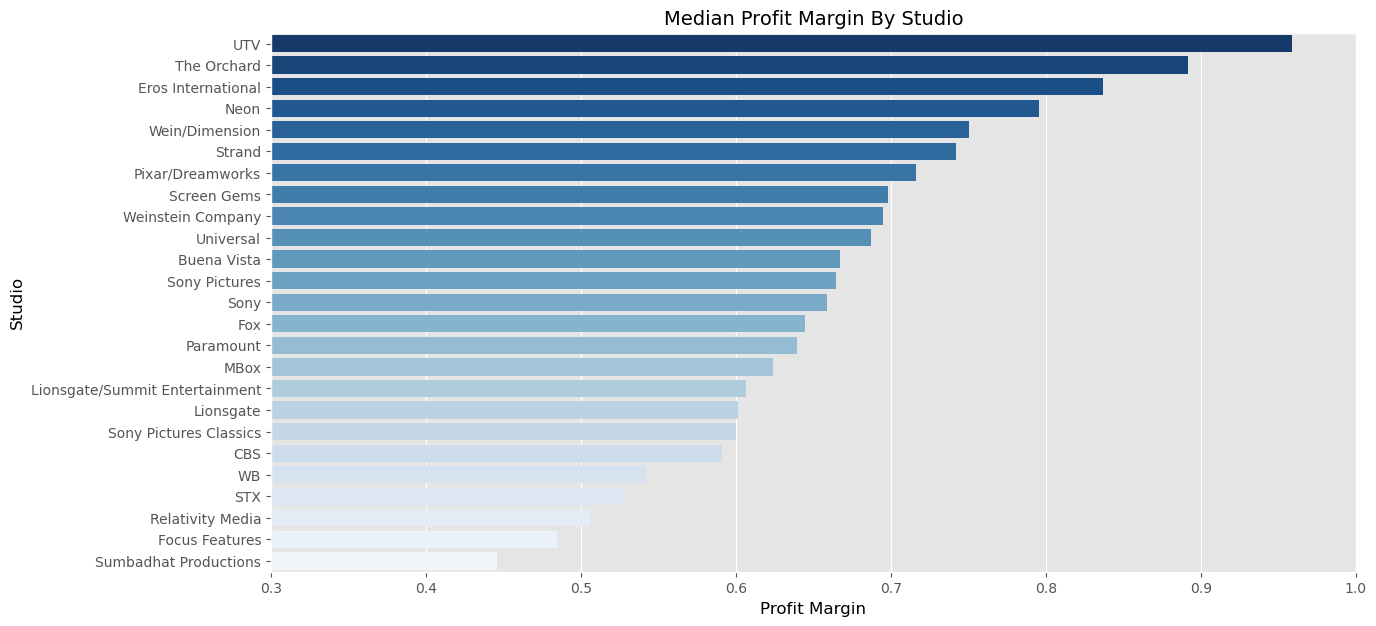

In [183]:
# Plot the above findings.
plt.figure(figsize=(14,7))
ax16 = sns.barplot(x=profit_by_studiodf['Profit_Margin'], y=profit_by_studiodf['Studio'],
                   order=profit_by_studiodf.sort_values('Profit_Margin', ascending=False).Studio, palette=sns.color_palette("Blues_r", n_colors=len(profit_by_studiodf)))
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Profit Margin By Studio', fontsize=14)
plt.xlim(0.3, 1.0)
plt.savefig('ProfitMarginStudio')


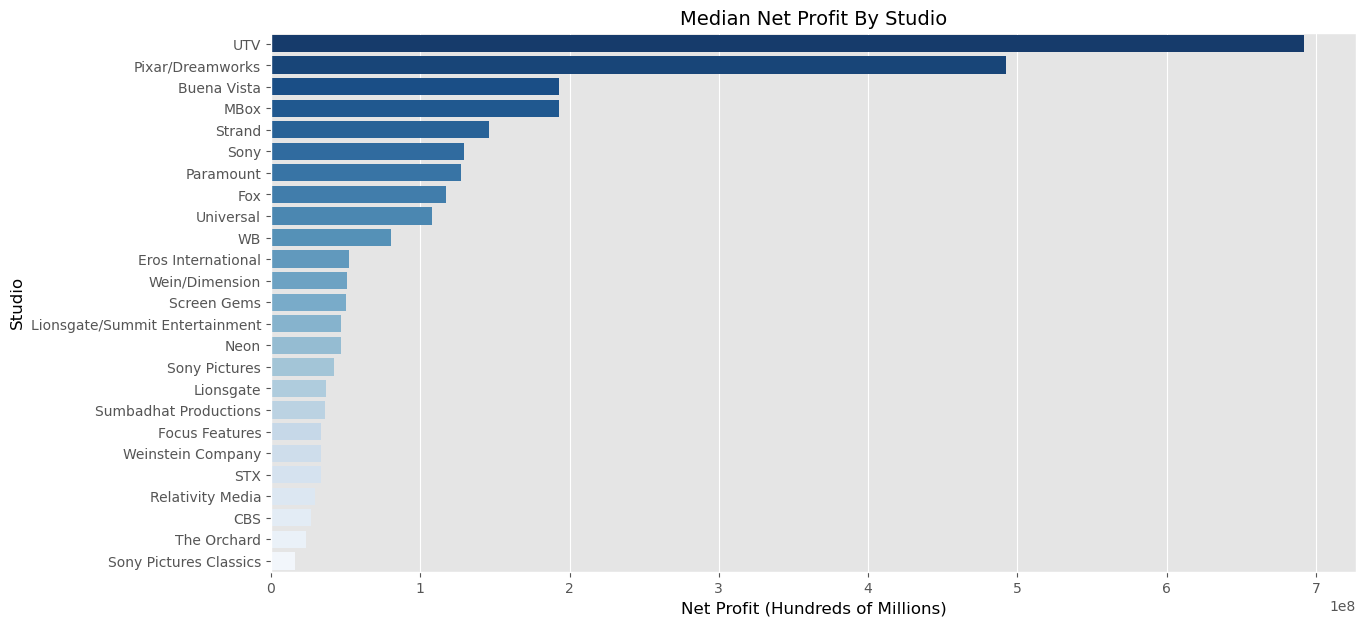

In [185]:
# Plot the above findings.
plt.figure(figsize=(14,7))
ax16 = sns.barplot(y=profit_by_studiodf['Studio'], x=profit_by_studiodf['Adjusted_Profit'], palette=sns.color_palette("Blues_r", n_colors=len(profit_by_studiodf)))
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Net Profit By Studio', fontsize=14)
plt.savefig('NetProfitStudio')


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        We can observe from the graph above that the major players in the studio industry have profit margins ranging from 24% to 95%, reflecting a wide range in defining success. However, the top 25 studios depicted are prominently recognized in the movie industry. Similar to our previous analyses, we utilize the median profit margin of the top 25 studios as a benchmark for success among major studios, which stands at 66%.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        In the upcoming analysis, we'll delve deeper into some of these major studios to identify key metrics to emulate. It's noteworthy to consider that UTV, boasting the highest profit margin among all studios, operates as a subsidiary of Disney.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <strong>Question 7 Conclusion:</strong> Microsoft should target a profit margin of 66% and a net profit of slightly over 50 million per movie to effectively compete with the top existing studios.
    </p>
</div>

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 24px; margin-bottom: 10px;">Question 8: Identifying Best Practices from Competitors</h2>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        To glean insights into best practices from competitors, we'll enhance the `theaters_df` dataframe by adding a column to calculate the money grossed per theater for each movie. Subsequently, we can group the data by studio to assess the performance of each competitor.
    </p>
</div>

In [90]:
theaters_df['dollars_per_theater'] = theaters_df['total_dom_gross($)'] / theaters_df['max_theaters']
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.75
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.19
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.37
3,Toy Story 4,4575,2019,434038008,Disney,94871.70
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.49


In [91]:
#Let's see what the average is for max number of theaters and for gross per theater for each studio
average_theaters = theaters_df.groupby('studio').mean()
average_theaters_ranked = average_theaters.sort_values(by=['studio'],ascending=False)
average_theaters_ranked.reset_index(inplace=True)
average_theaters

C:\Users\Manas\AppData\Local\Temp\ipykernel_12236\3549993632.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_theaters = theaters_df.groupby('studio').mean()


,max_theaters,year,total_dom_gross($),dollars_per_theater
studio,,,,
Disney,3682.32,2010.59,202617891.97,51856.14
DreamWorks Distribution,3408.26,2002.95,118198315.42,33102.06
Lionsgate,3356.24,2014.47,95268293.14,26485.34
Metro-Goldwyn-Mayer (MGM),3259.14,2004.00,78437576.64,23829.21
New Line Cinema,3410.57,2001.86,249718149.29,72518.24
Paramount Pictures,3466.71,2010.71,108614912.30,30508.47
Sony,3478.36,2010.56,116677932.63,32626.67
TriStar Pictures,3146.00,2014.00,80703217.29,25546.75
Twentieth Century Fox,3493.98,2011.21,111009777.12,31119.14


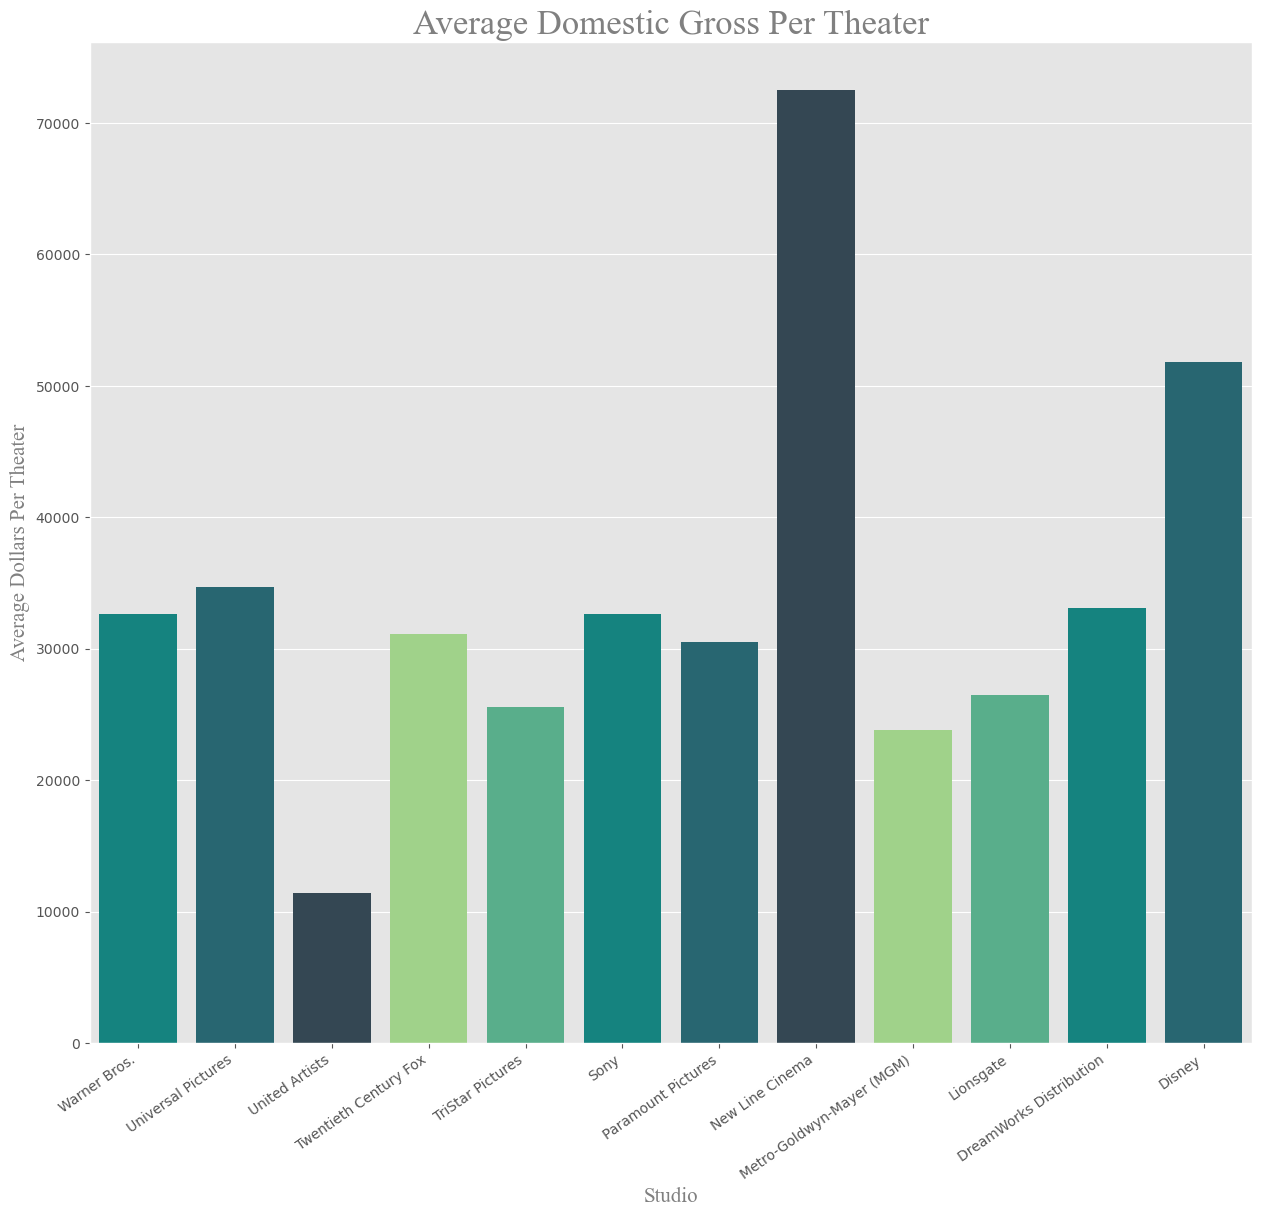

In [186]:
plt.figure(figsize=(15,13))
ax16 = sns.barplot(x='studio', y='dollars_per_theater', data=average_theaters_ranked, palette=['#039590', '#1C6E7D', '#2F4858', '#9BDE7E', '#4BBC8E'])
plt.xlabel('Studio', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title("Average Domestic Gross Per Theater", fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.ylabel('Average Dollars Per Theater', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.xticks(rotation=35, horizontalalignment='right')
plt.savefig('DomesticPerTheater', dpi=300)



<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        In the bar plot above, Disney and New Line Cinema stand out. We need to ensure there is an adequate number of movies from each of these studios before drawing conclusions.
    </p>
</div>

In [93]:
theaters_df['studio'].value_counts()

Warner Bros.                 208
Twentieth Century Fox        165
Disney                       147
Universal Pictures           136
Sony                         135
Paramount Pictures           112
Lionsgate                     49
DreamWorks Distribution       19
Metro-Goldwyn-Mayer (MGM)     14
New Line Cinema                7
TriStar Pictures               7
United Artists                 1
Name: studio, dtype: int64

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        We can see that New Line Cinema only has 7 movies in this dataframe, which means that their average domestic gross per theater is going to be skewed. Disney is certainly still a possibility, and we should also consider Warner Bros. and Twentieth Century Fox.
    </p>
</div>

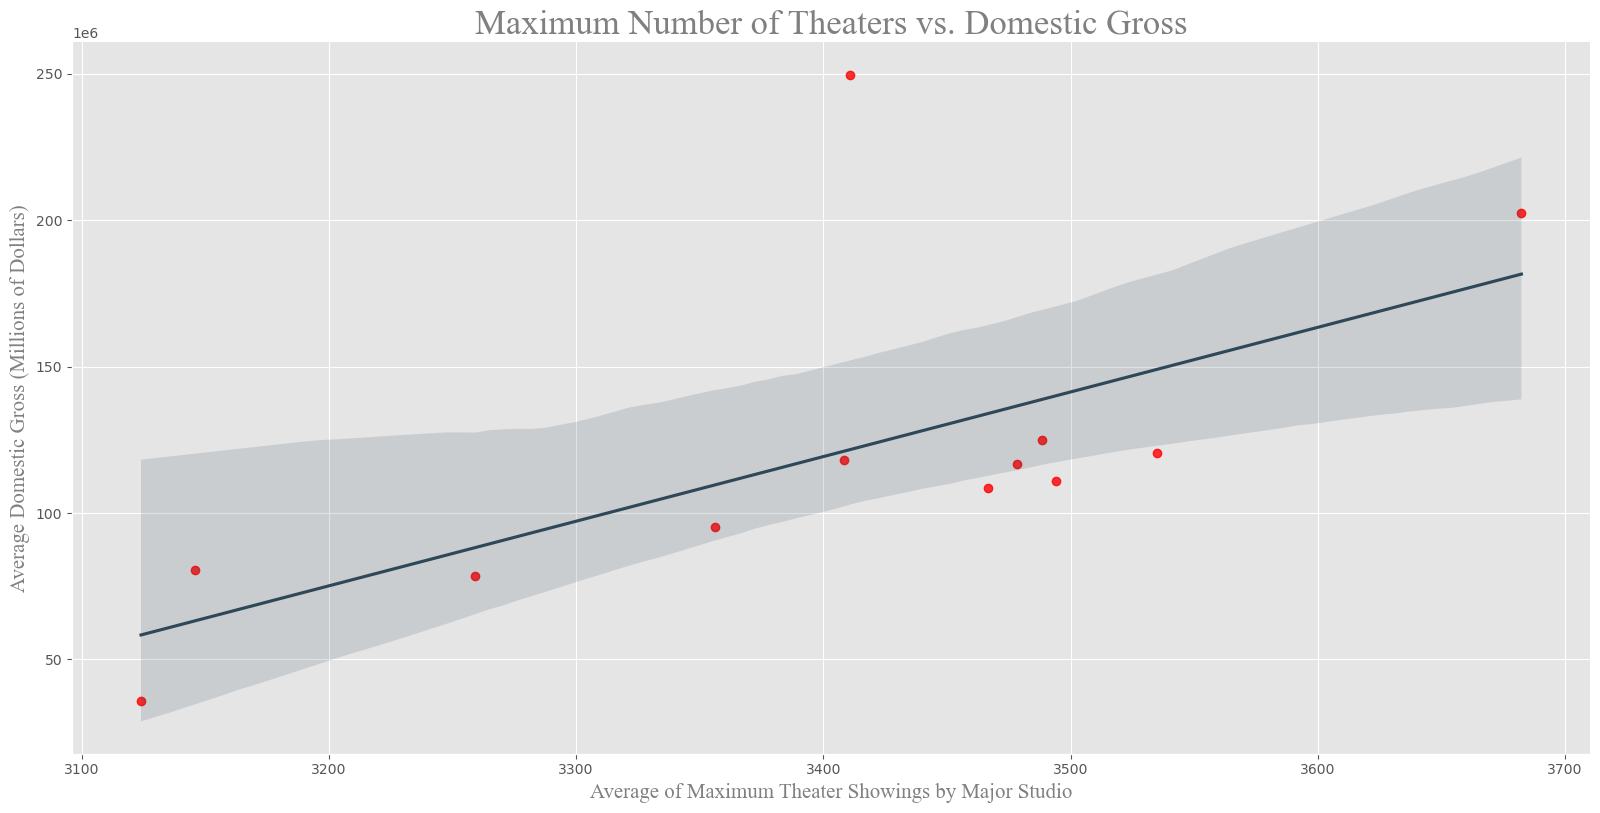

In [188]:
ax17 = sns.lmplot(x='max_theaters', y='total_dom_gross($)', data=average_theaters, height=8, aspect=2, line_kws={'color': '#2F4858'}, scatter_kws={'color': 'red'})
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xlabel('Average of Maximum Theater Showings by Major Studio', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Average Domestic Gross (Millions of Dollars)', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '15'})
plt.title('Maximum Number of Theaters vs. Domestic Gross', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': '25'})
plt.savefig('TheatersVGross', dpi=300)



<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        The scatter plot illustrates a positive correlation between the average number of theaters and the average domestic gross. New Line Cinema appears as the sole outlier due to its association with a small number of movies in our dataset. Disney stands out as the studio farthest to the right and above the trend line, reinforcing its position as a strong contender.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        We'll now merge the theater and awards dataframes to identify which studios boast the best win rates at the Oscars.

In [95]:
theaters_df.set_index(['title', 'year'], inplace=True)

In [96]:
theaters_and_awards = theaters_df.join(awards_df, how='inner', on=['title', 'year'])

In [97]:
theaters_and_awards.groupby('studio').count()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,22,22,22,22,22,22
DreamWorks Distribution,4,4,4,4,4,4
New Line Cinema,2,2,2,2,2,2
Paramount Pictures,7,7,7,7,7,7
Sony,6,6,6,6,6,6
Twentieth Century Fox,4,4,4,4,4,4
Universal Pictures,6,6,6,6,6,6
Warner Bros.,15,15,15,15,15,15


In [98]:
theaters_and_awards.groupby('studio').mean()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,3818.73,305217242.45,78797.61,1.36,3.00,0.60
DreamWorks Distribution,3444.25,153223630.75,44447.63,2.00,4.25,0.60
New Line Cinema,3662.50,358408603.00,97814.75,6.50,8.50,0.67
Paramount Pictures,3564.86,140835427.57,38930.82,1.00,3.71,0.45
Sony,3653.67,237842295.67,64720.23,1.17,3.17,0.54
Twentieth Century Fox,3501.75,136874930.25,38404.79,2.25,6.00,0.43
Universal Pictures,3338.83,149344665.00,44970.82,1.33,3.33,0.51
Warner Bros.,3831.60,234055876.80,60023.04,2.67,5.87,0.56


<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        Unfortunately, the merging of the dataframes resulted in only 66 common movies, limiting our dataset for trend analysis. However, we'll proceed by considering the average number of theaters and win rates to draw insights. Disney is associated with 22 movies in our merged dataframe, while Warner Bros. has 15. Although Warner Bros. has a higher average number of theaters, Disney maintains a notable $18,000 advantage in average domestic gross per theater. Additionally, Disney boasts a higher win rate for Oscars, nearly 60%.
    </p>
    <p style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <strong>Question 8 Conclusion:</strong> Our Company should study Disney's best practices and leverage the success of this established studio.
    </p>
</div>

<div style="background-color: #2F4858; border-radius: 10px; padding: 20px;">
    <h2 style="font-family: Arial; color: #FFFFFF; font-size: 24px; margin-bottom: 10px;">Conclusion</h2>
    <ol style="font-family: Arial; color: #FFFFFF; font-size: 18px; line-height: 1.5;">
        <li>I recommend that we should budget approximately \$82,250,000 to make a movie. This should correlate with a profit margin above 80\%.</li>
        <li>I recommend that we should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.</li>
        <li>I recommend that we release the bulk of their movies, especially Animation, during the summer months. Adventure, Drama and Comedy movies would see similar success if released in November, but the recommendation remains to focus on summer.</li>
        <li>Question 4 Conclusion: I recommend that we focus their cast and crew search to individuals who consistently score at least 1.0 on the VAR score. We can, with a high level of confidence, conclude that these individuals will elevate the overall production.</li>
        <li>We should spend at least \$35,465,000 in order to make an Oscar-winning movie.</li>
        <li>I recommend that we take into consideration the rating of the movie based on the genre and target audience. If making animation movies, it is wise to stick to a G or PG rating, otherwise PG-13 is the sweetspot. In terms of runtime, there is little correlation in terms of overall profitability.</li>
        <li>We should aim for a profit margin of 66% and a net profit of slightly over 50 million per movie to compete with the top existing studios.</li>
        <li>We should research Disney's best practices and try to build off the success of this well-established studio.</li>
    </ol>
</div>
